In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from astropy.timeseries import LombScargle
from astropy.timeseries import LombScargleMultiband

/tmp/ipykernel_14449/1891166173.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Periodograms

In [3]:
data_global = pd.read_pickle("../../PeriodogramsGaia/dataset/data_global.pkl")

In [4]:
def folded_lc_image(lc, period, d_folder_lc):
    fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)

    for name_band, data in lc.groupby("band"):
        mask = data["rejected_by_variability"]=="false"
        mjd, flux, flux_err = data.loc[mask][['time', 'flux', 'flux_error']].values.T
        phase = np.mod(mjd, period)/period
        ax.errorbar(phase, flux, flux_err, fmt='.', label=name_band)
        
    ax.set_xlabel(f'Phase @ P:{period:0.4f}')
    ax.set_ylabel('Flux')
    ax.set_title(f'Source_id: {lc["source_id"].loc[0]}')
    ax.legend()
    plt.savefig(d_folder_lc + "/folded_light_curve.png")

In [5]:
def periodograms_band(lc,period, d_folder_lc, freq):
    fig, ax = plt.subplots(3, figsize=(6,4), tight_layout=True, sharex=True, sharey=True)

    for (name, data), ax_ in zip(lc.groupby("band"), ax):
        band = data['band'].iloc[0]
        mask = data["rejected_by_variability"]=="false"
        time, flux, flux_err =data.loc[mask][['time', 'flux', 'flux_error']].values.T
        per = LombScargle(time, flux, flux_err).power(freq)
        ax_.axvline(1/period, ls='--', lw=2, alpha=0.5, c='g')
        ax_.axvline(2/period, ls='--', lw=2, alpha=0.5, c='r')
        ax_.plot(freq, per)
        ax_.set_title('Periodogram band' + band)
    ax_.set_xlabel('Frequency [1/days]')
    plt.savefig(d_folder_lc + "/periodograms_band.png")

In [6]:
def periodogram_multiband(lc, period, d_folder_lc, freq):
    times, fluxs, ferrs, bands = [], [], [], []
    for (name, data) in lc.groupby("band"):
        mask = data["rejected_by_variability"]=="false"
        time, flux, flux_err = data.loc[mask][['time', 'flux', 'flux_error']].values.T
        times += list(time)
        fluxs += list(flux)
        ferrs += list(flux_err)
        bands += [name]*len(flux)
    per = LombScargleMultiband(times, fluxs, bands, ferrs).power(freq)

    fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True, sharex=True, sharey=True)
    ax.plot(freq, per)
    ax.axvline(1/period, ls='--', lw=2, alpha=0.5, c='g') # True period
    ax.axvline(2/period, ls='--', lw=2, alpha=0.5, c='r') # Half the period
    ax.set_title('Multi band periodogram')
    ax.set_xlabel('Frequency [1/days]')
    plt.savefig(d_folder_lc+'/periodogram_multiband.png')

/tmp/ipykernel_14449/2640656565.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True, sharex=True, sharey=True)


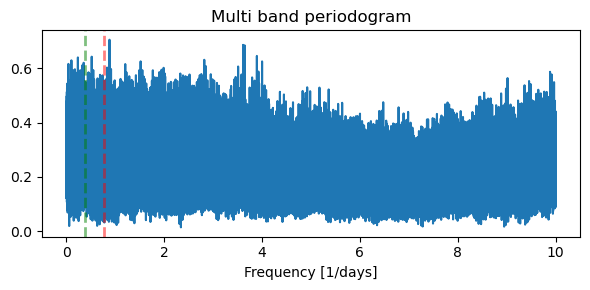

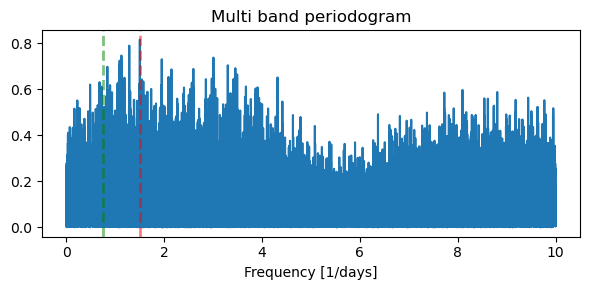

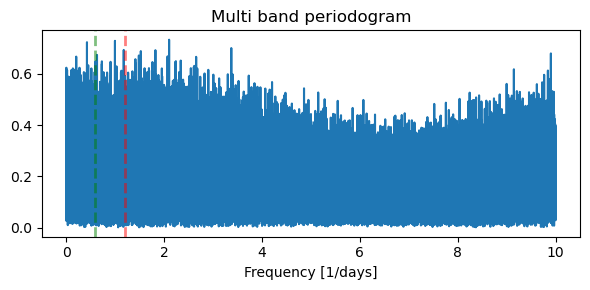

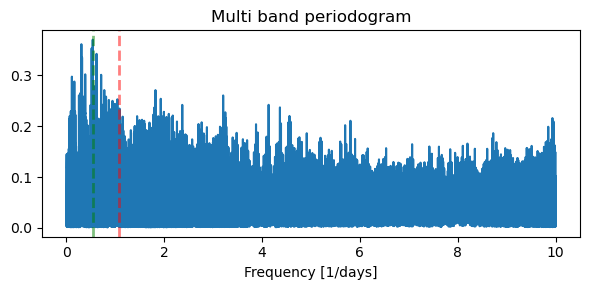

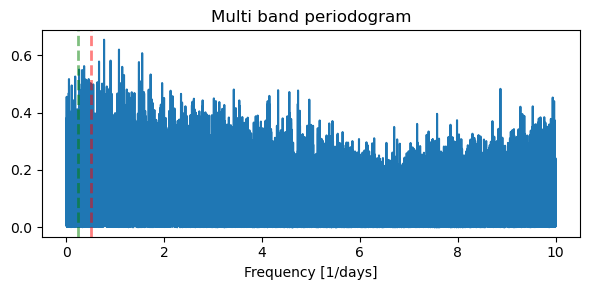

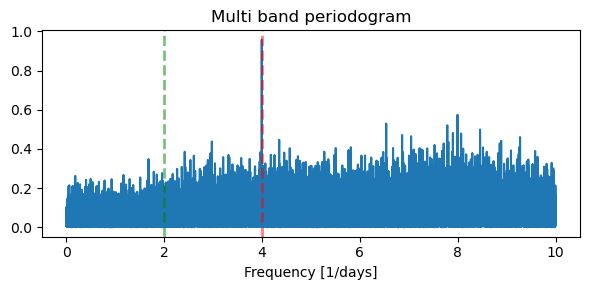

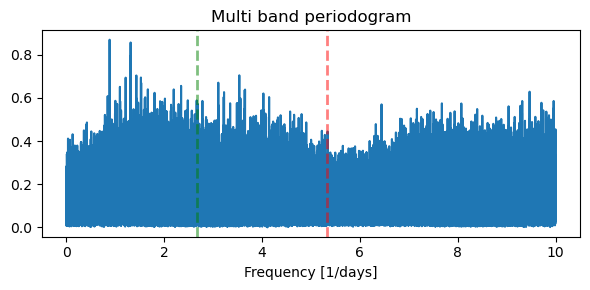

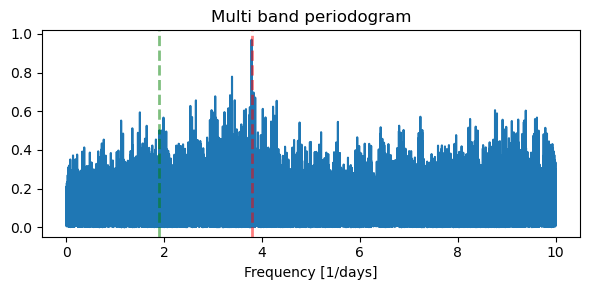

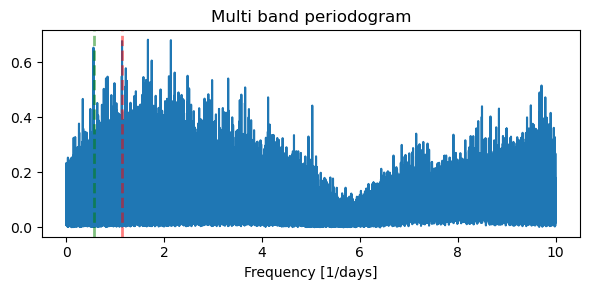

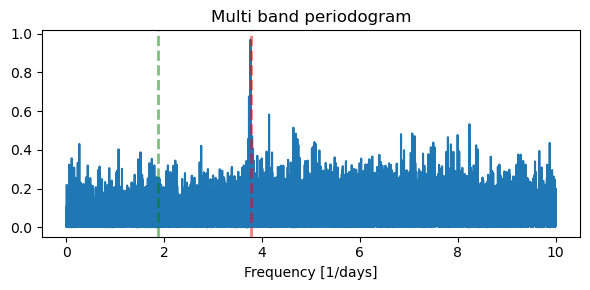

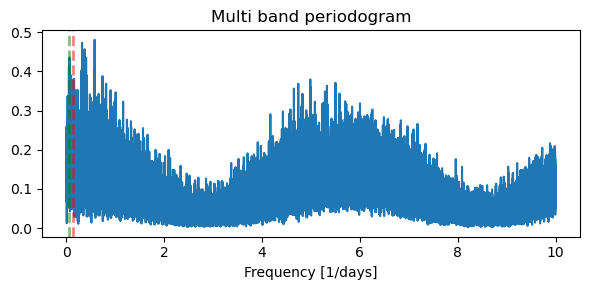

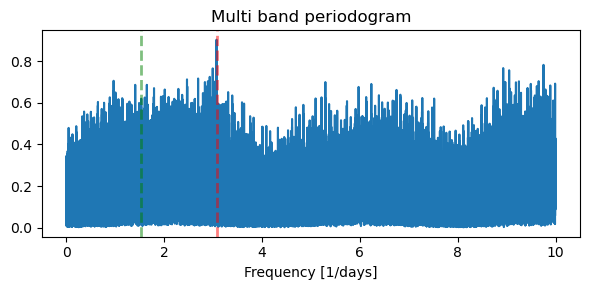

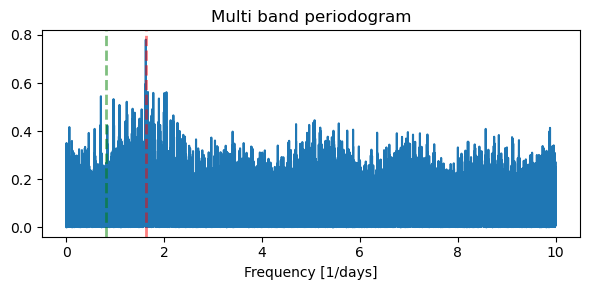

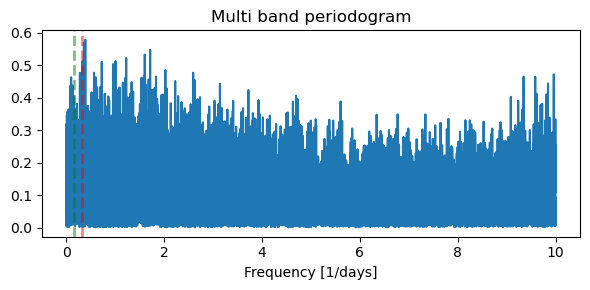

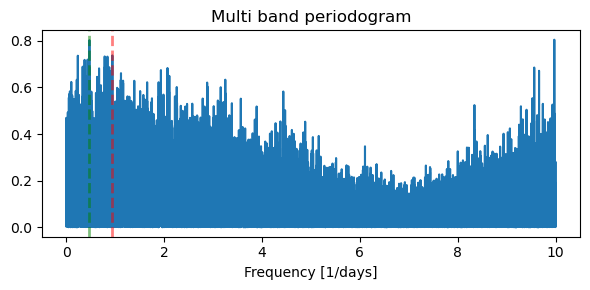

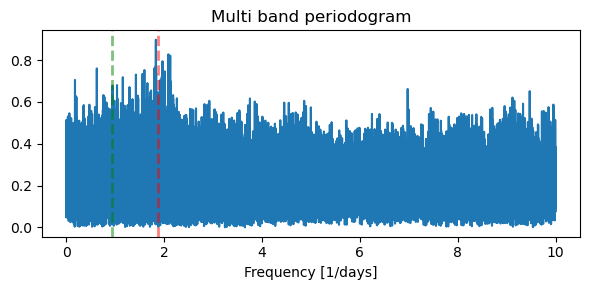

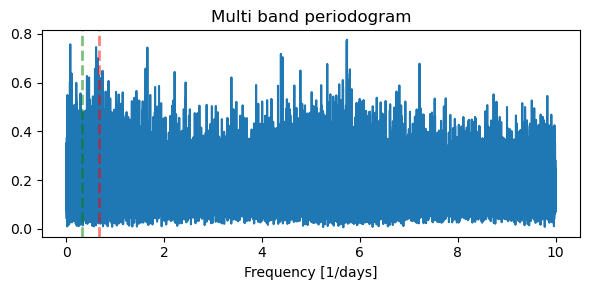

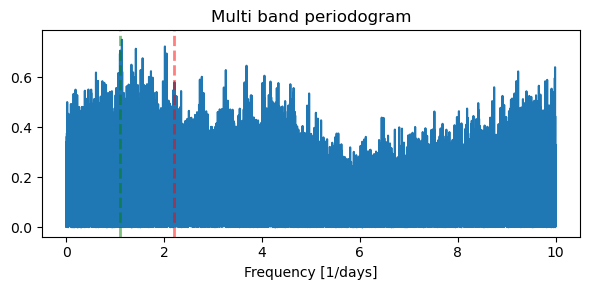

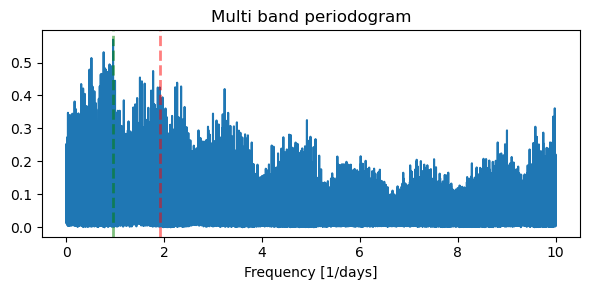

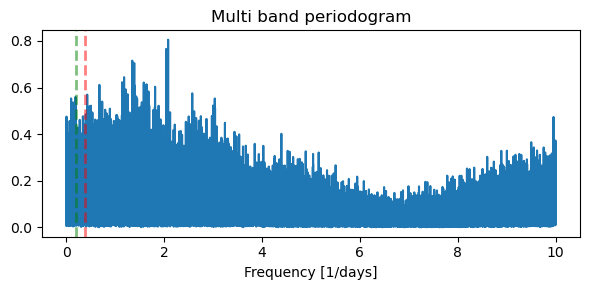

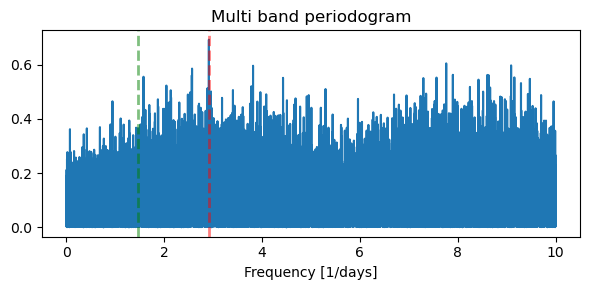

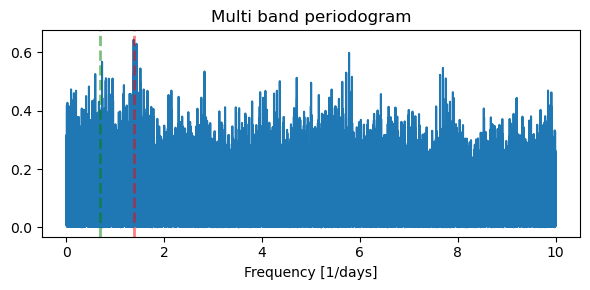

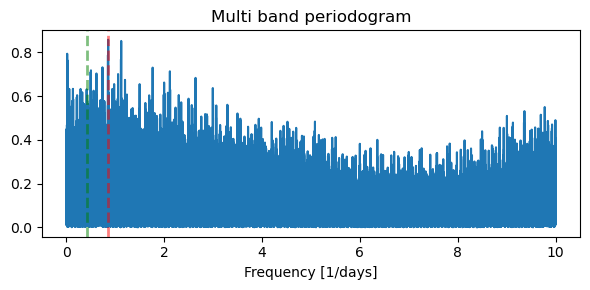

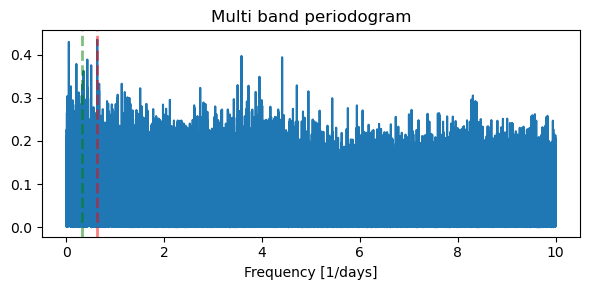

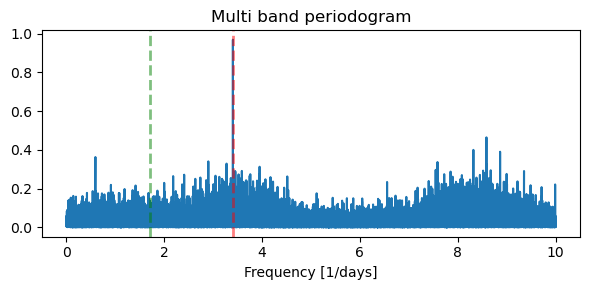

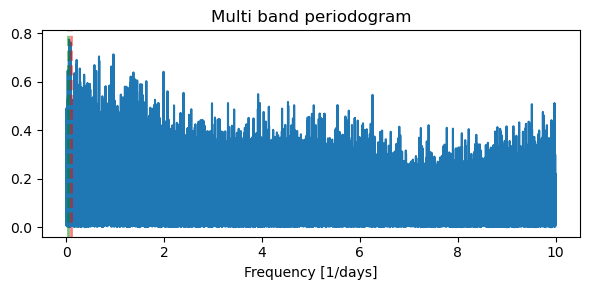

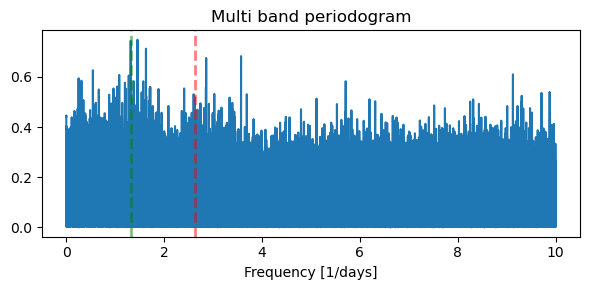

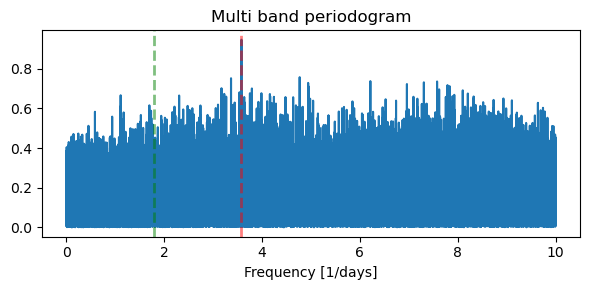

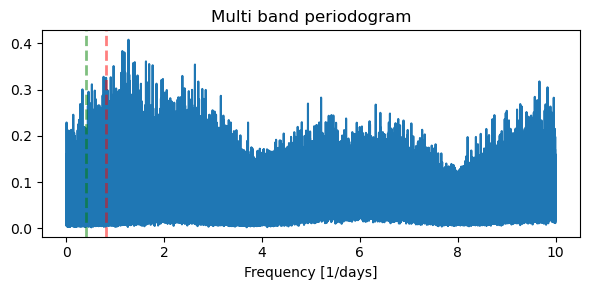

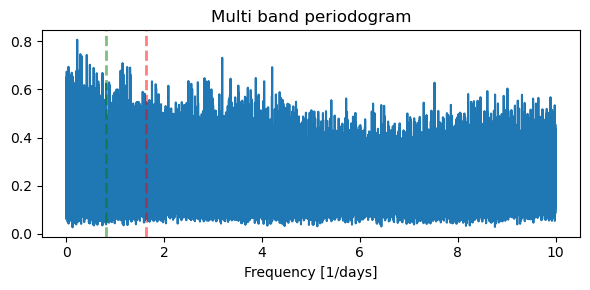

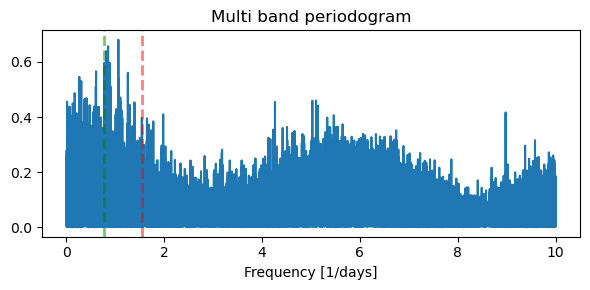

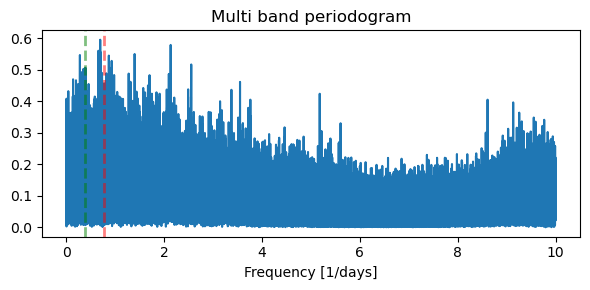

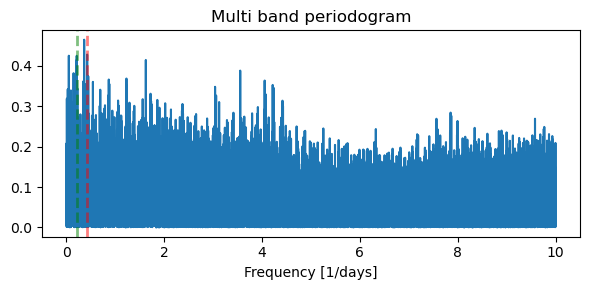

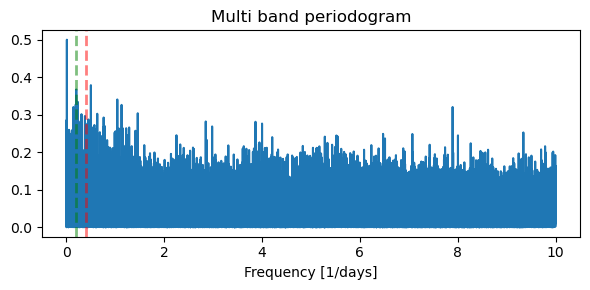

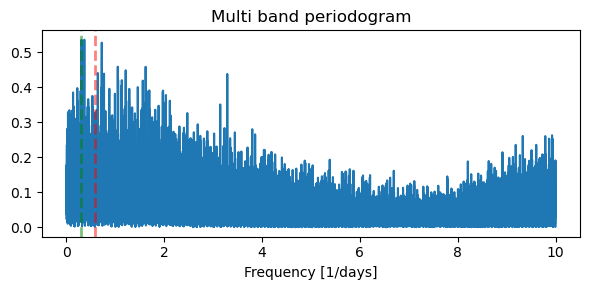

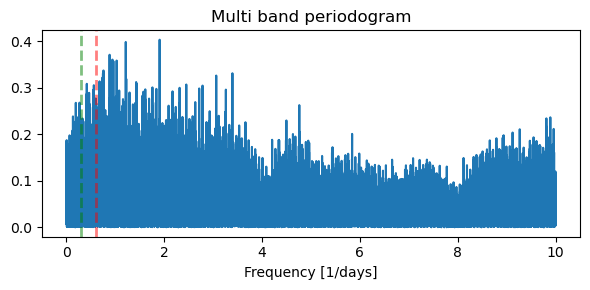

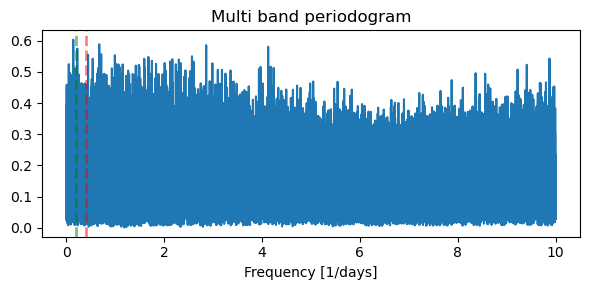

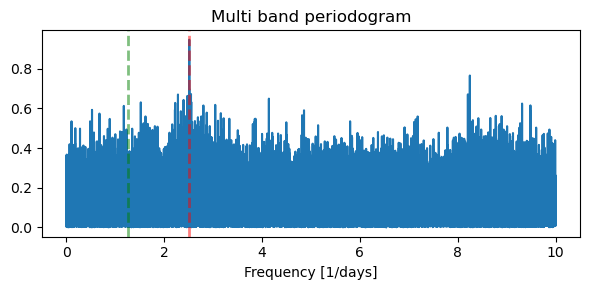

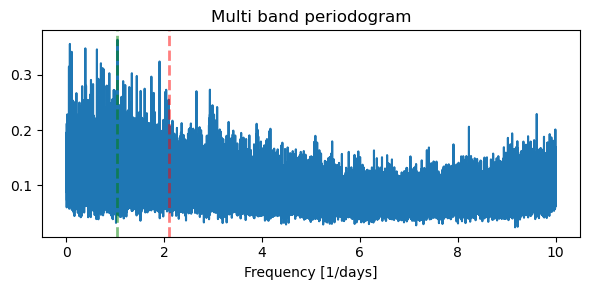

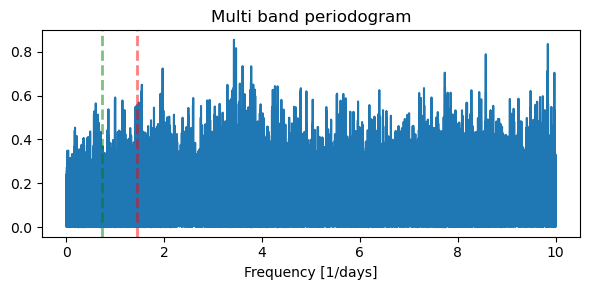

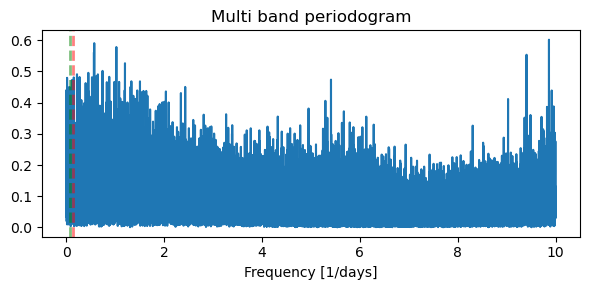

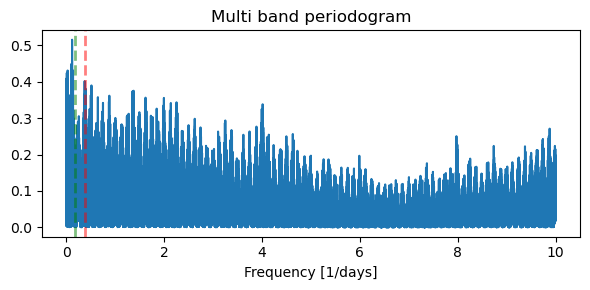

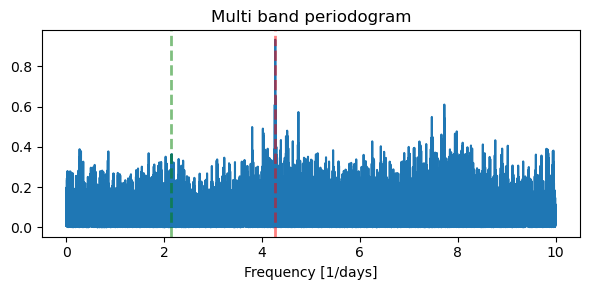

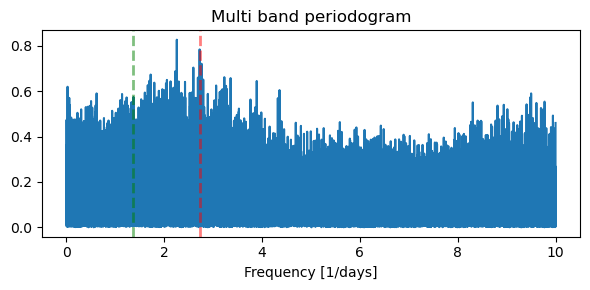

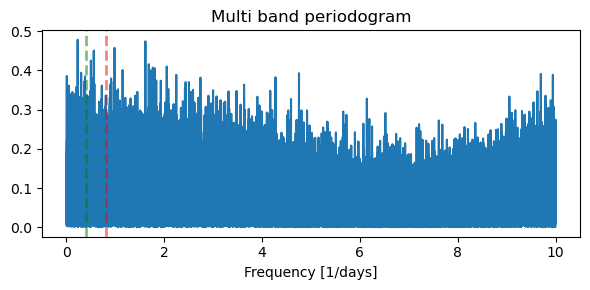

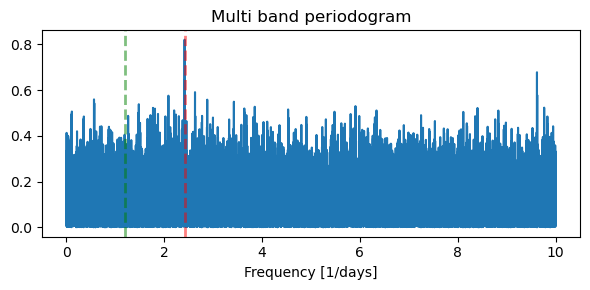

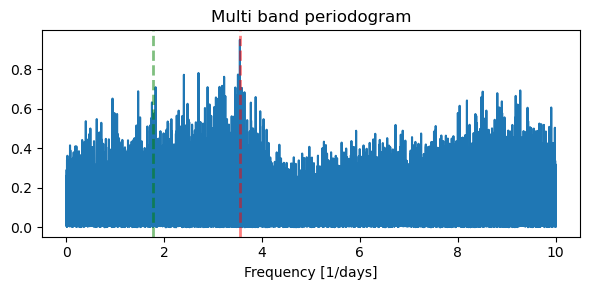

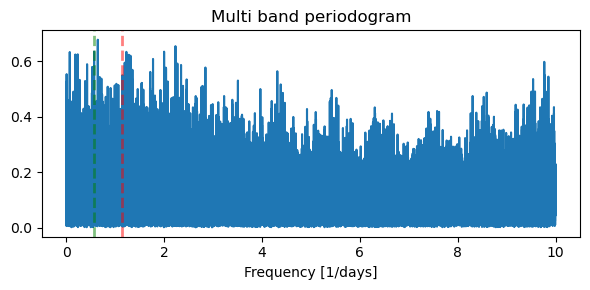

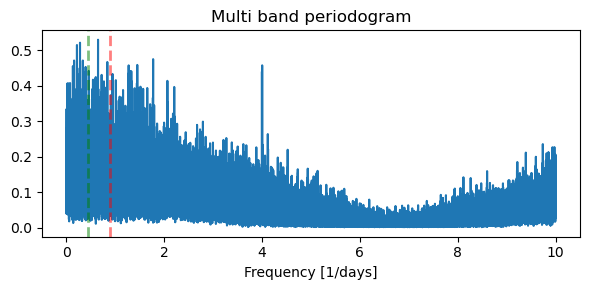

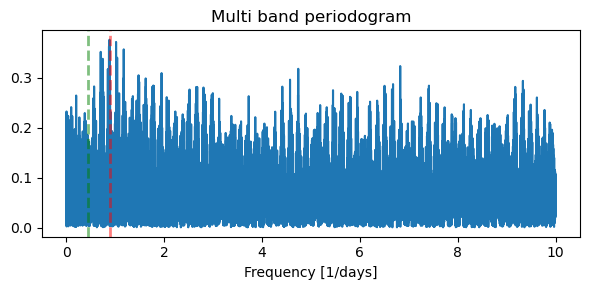

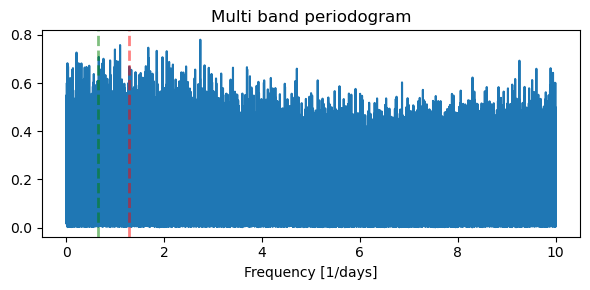

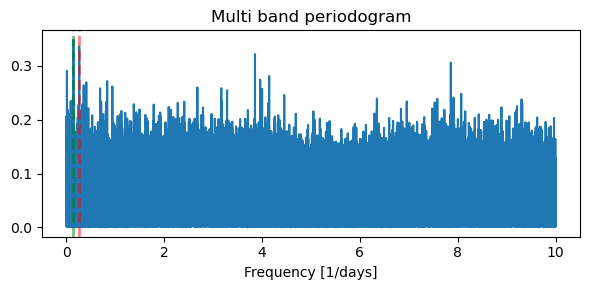

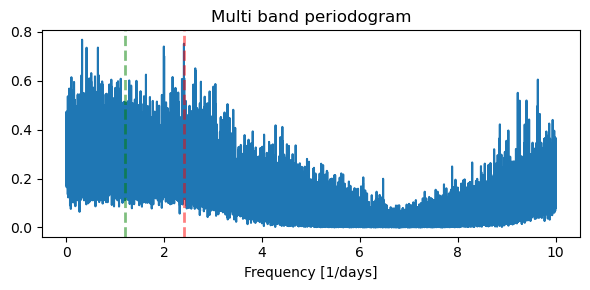

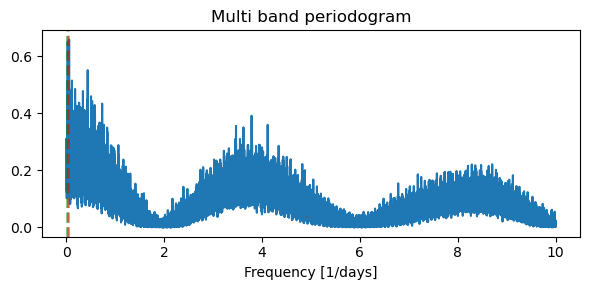

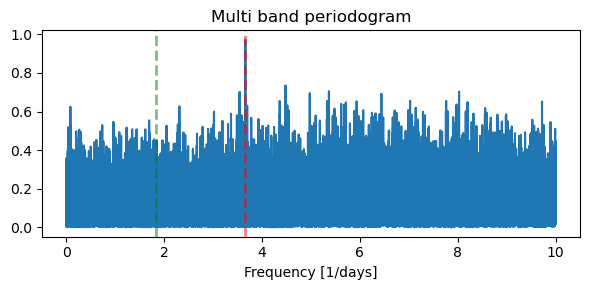

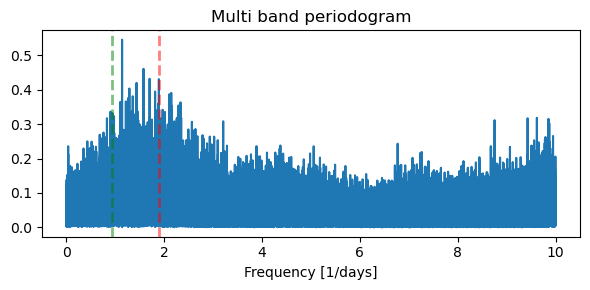

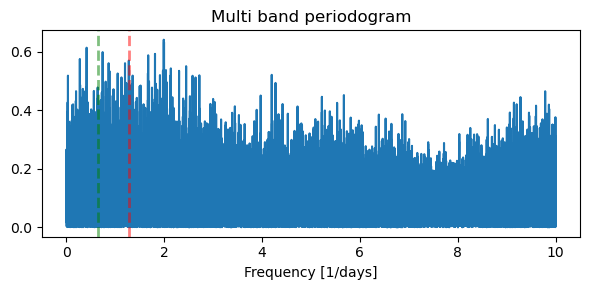

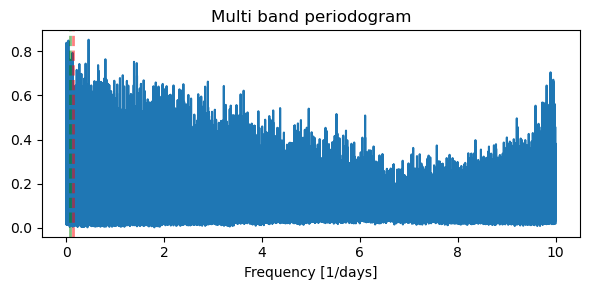

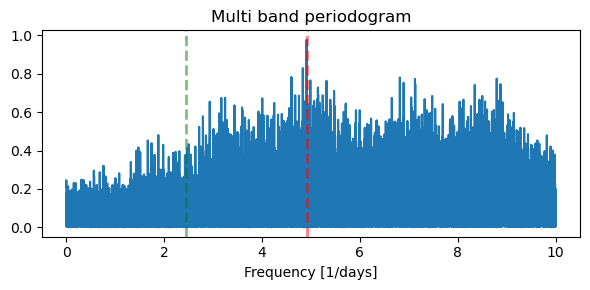

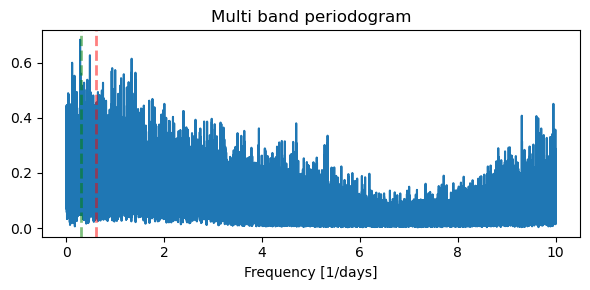

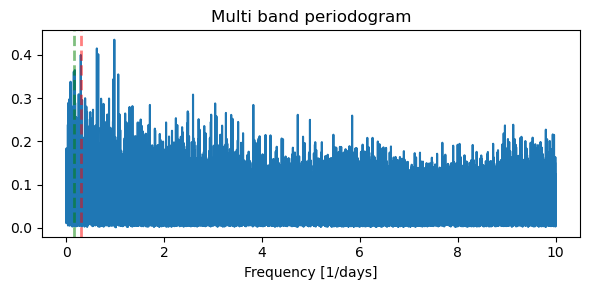

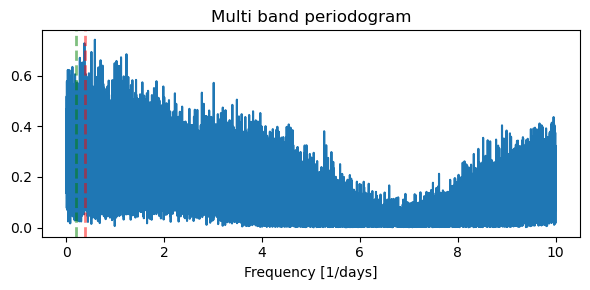

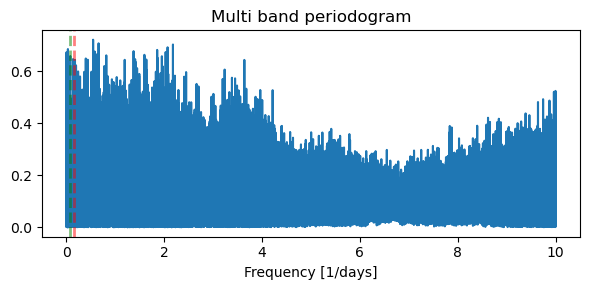

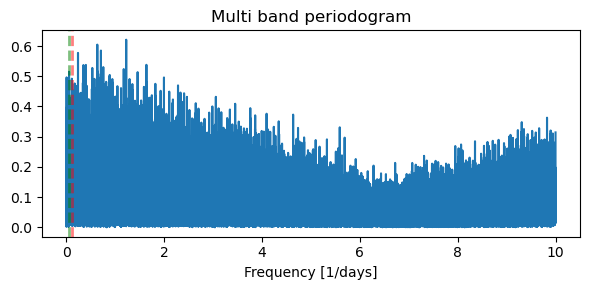

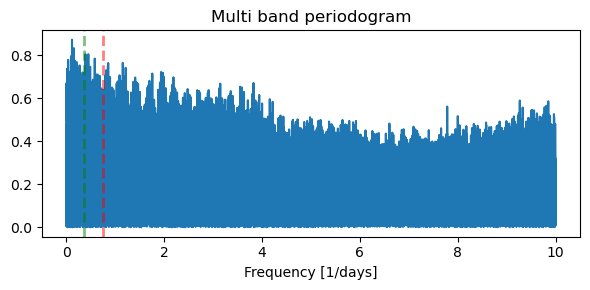

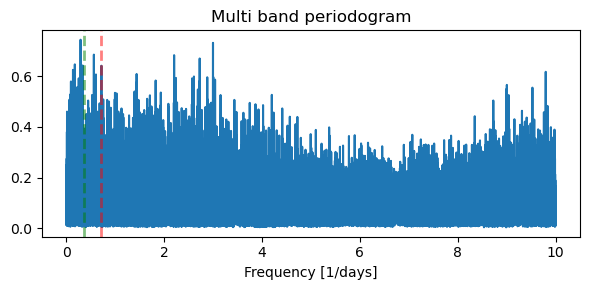

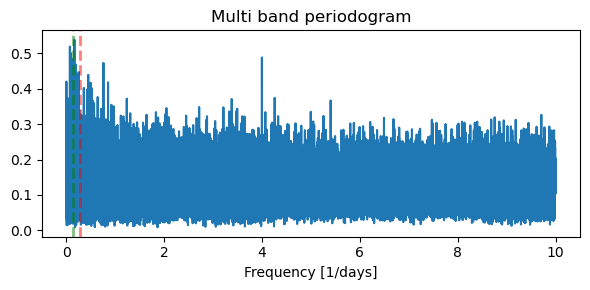

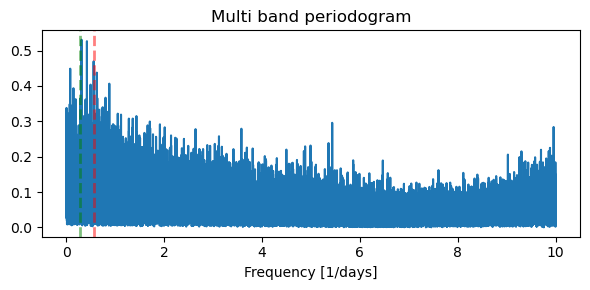

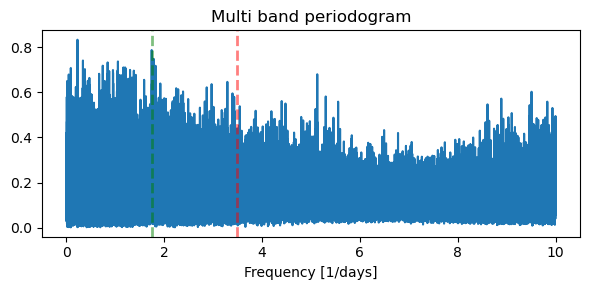

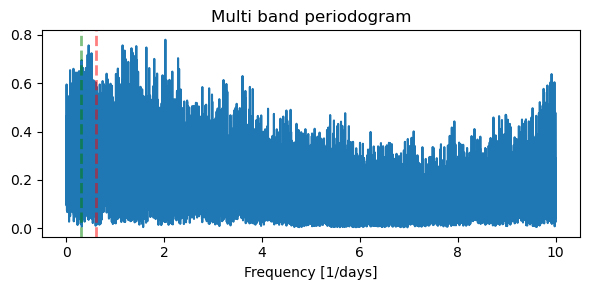

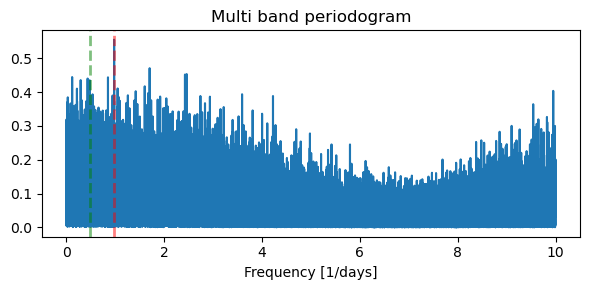

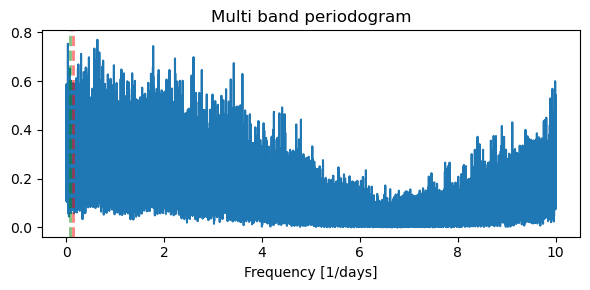

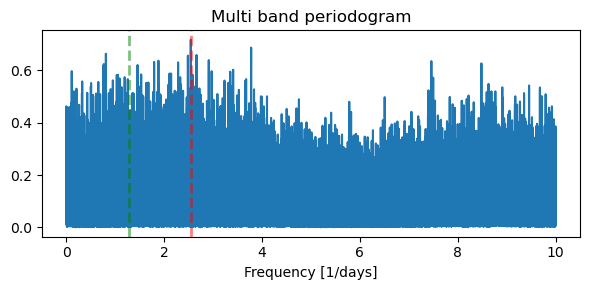

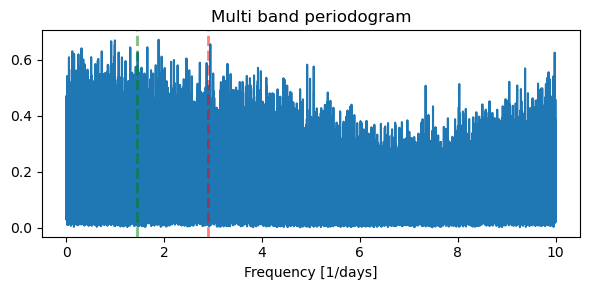

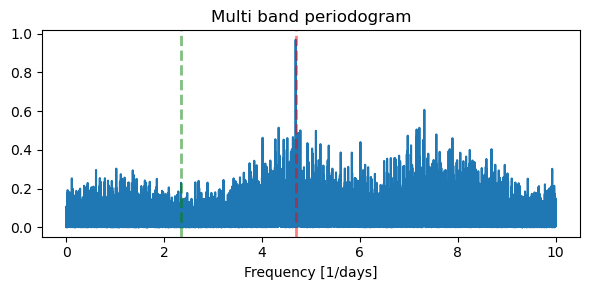

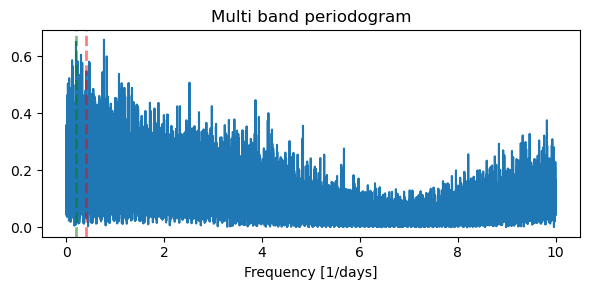

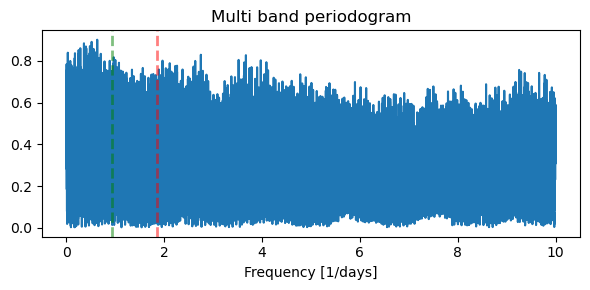

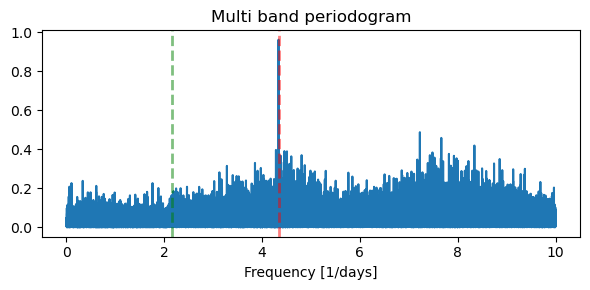

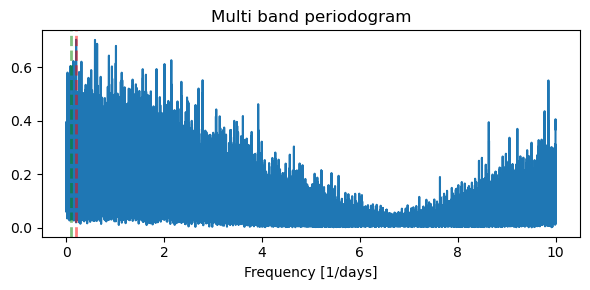

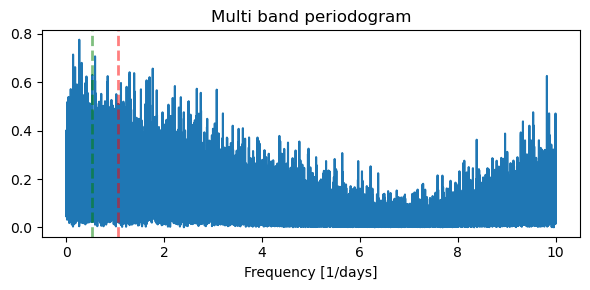

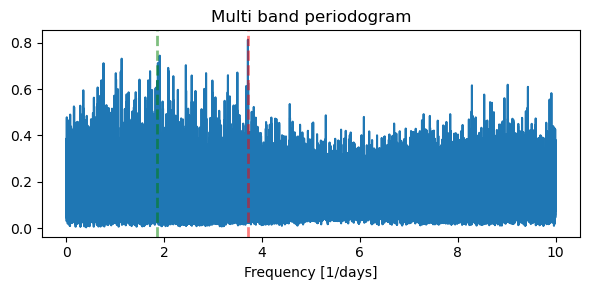

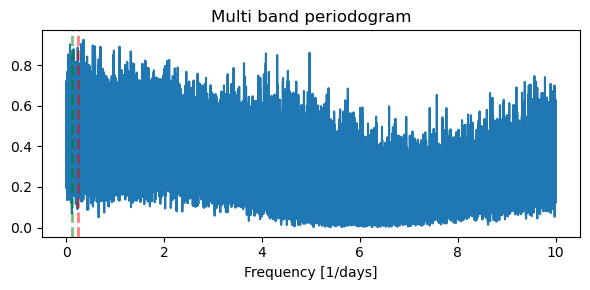

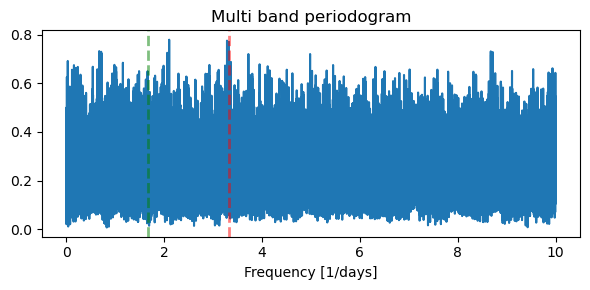

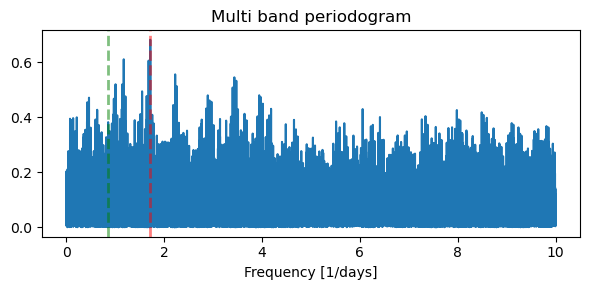

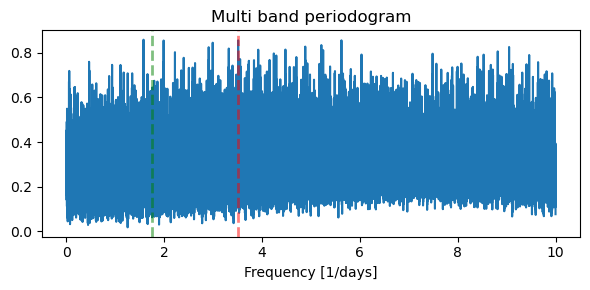

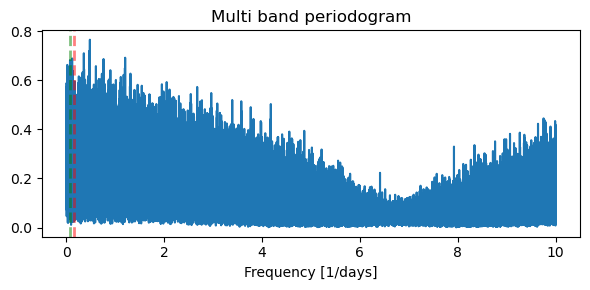

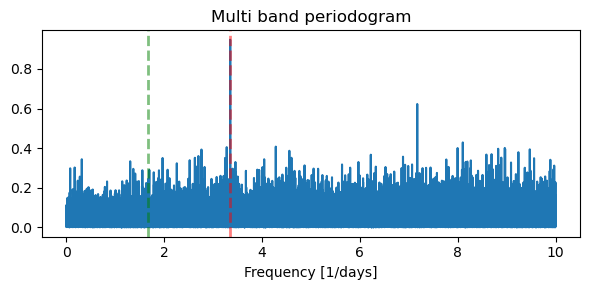

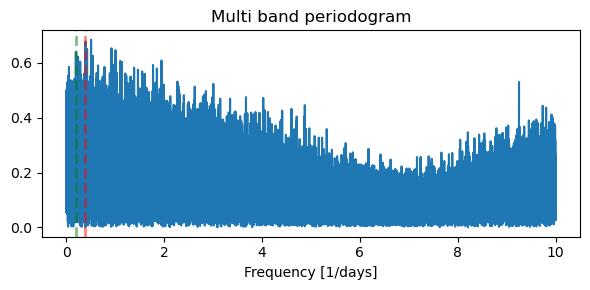

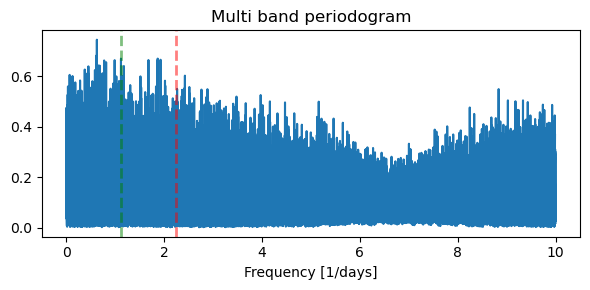

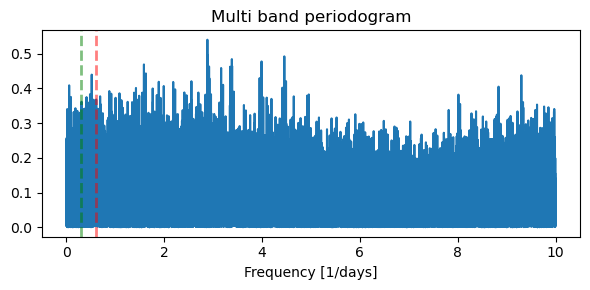

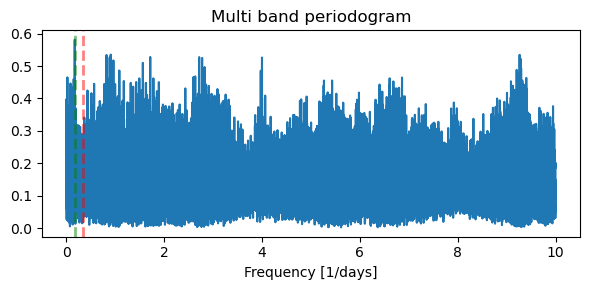

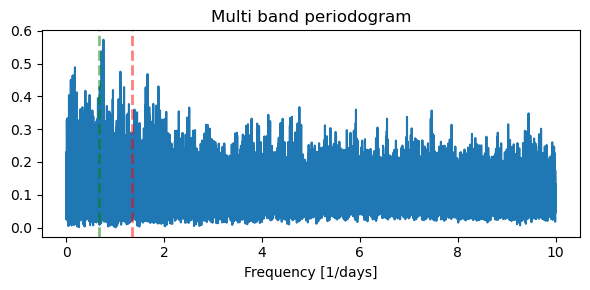

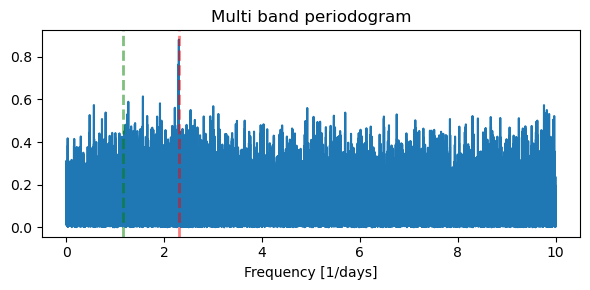

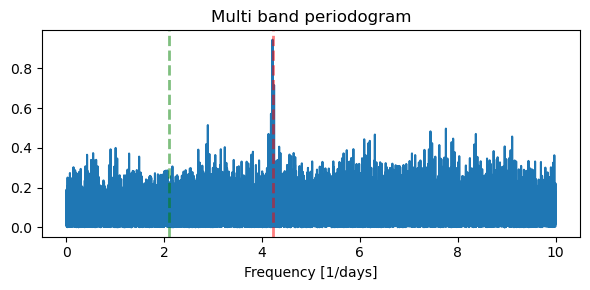

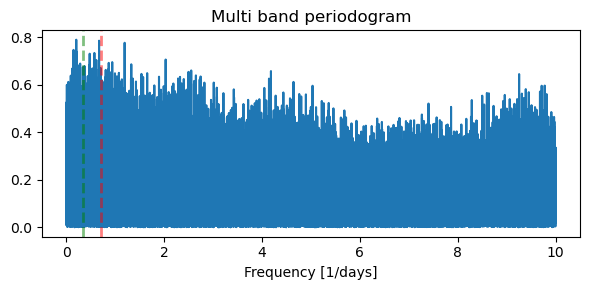

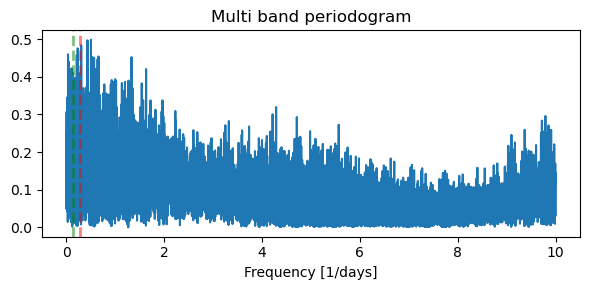

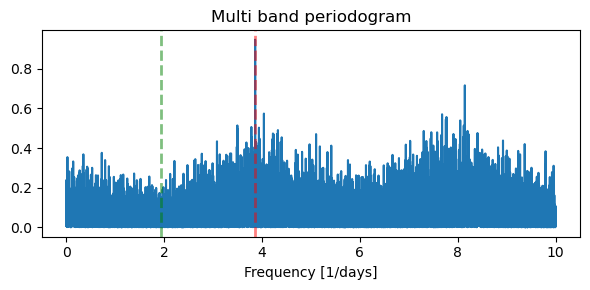

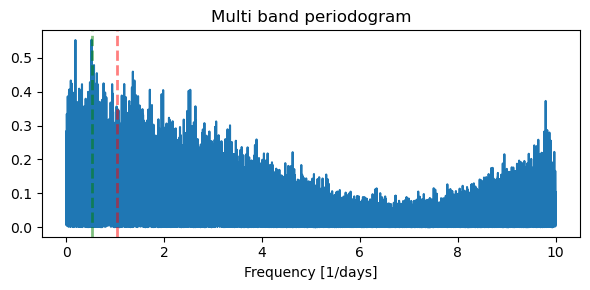

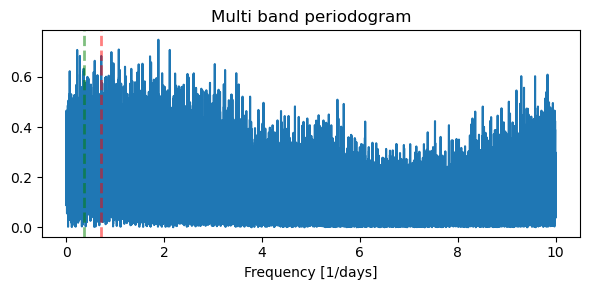

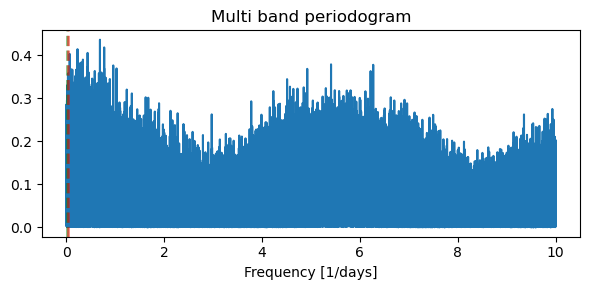

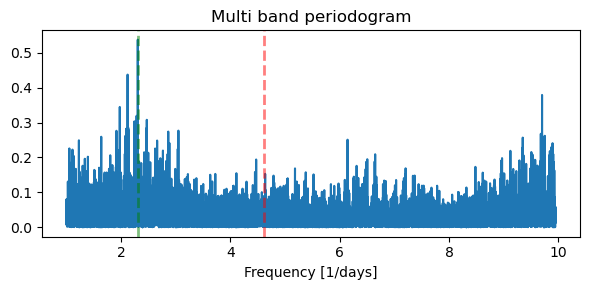

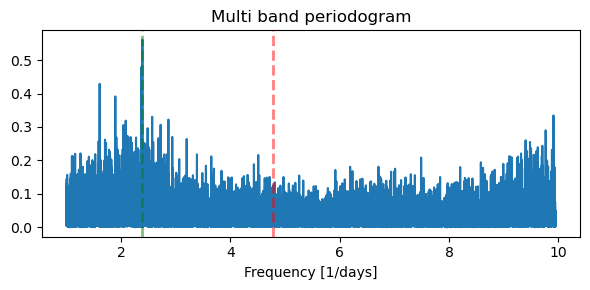

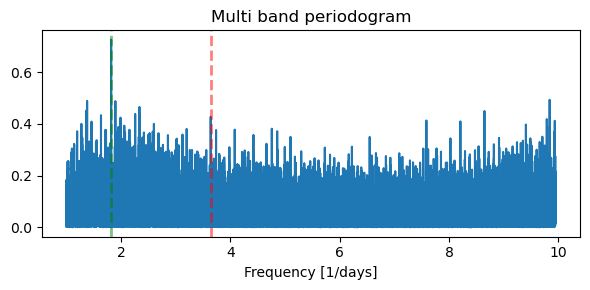

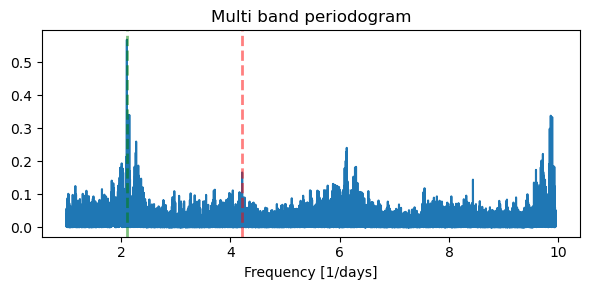

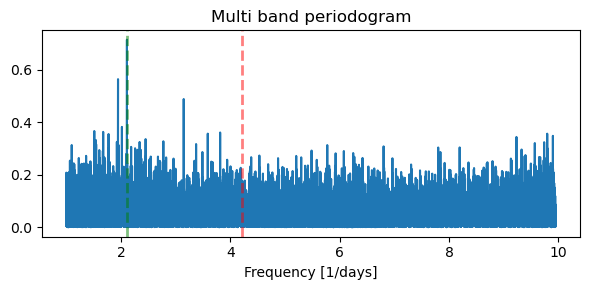

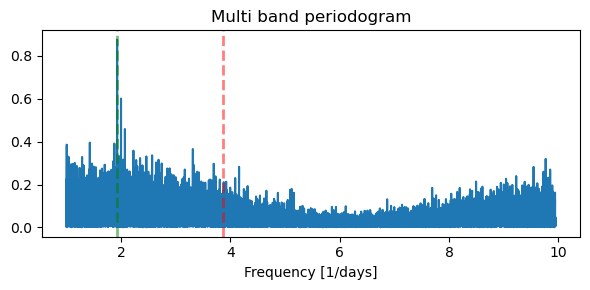

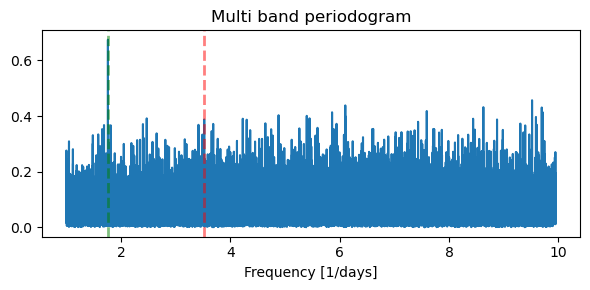

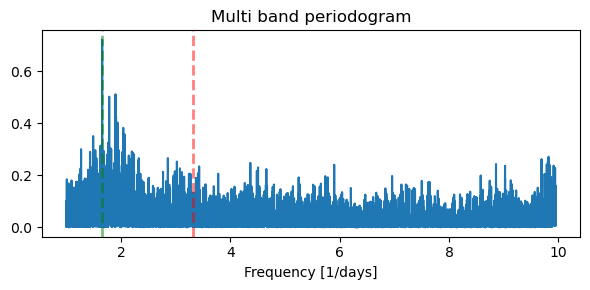

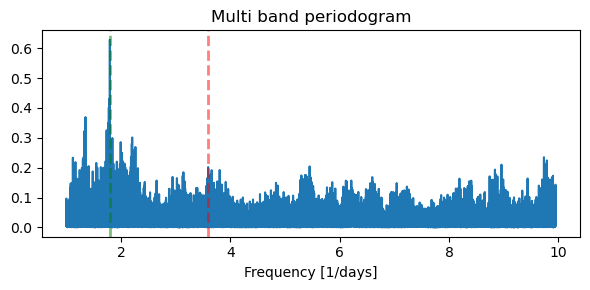

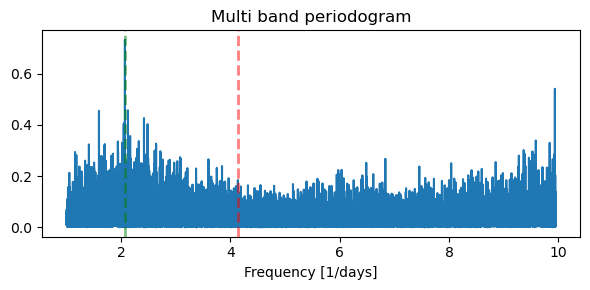

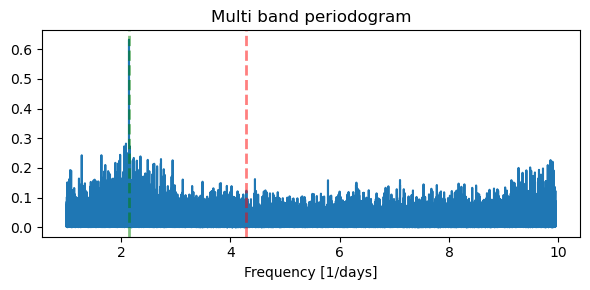

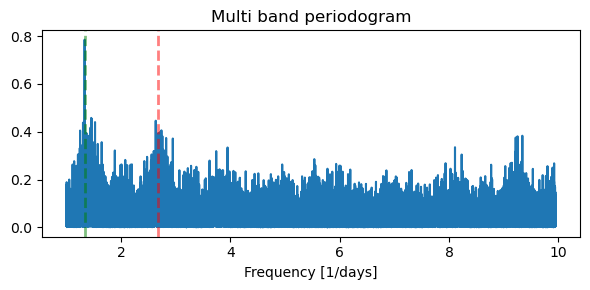

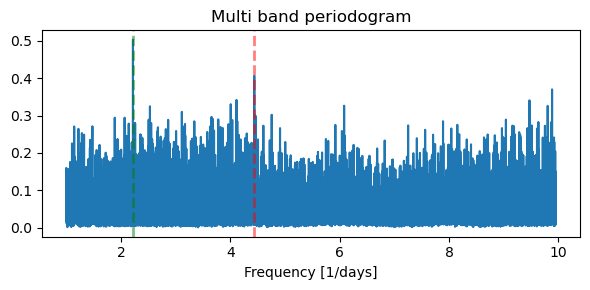

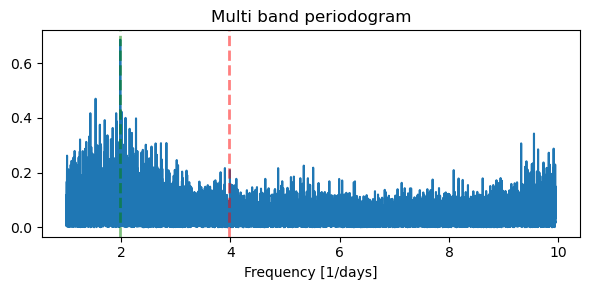

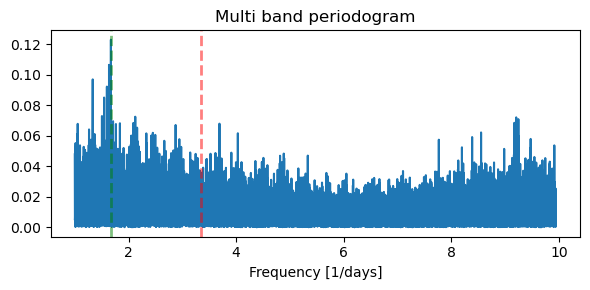

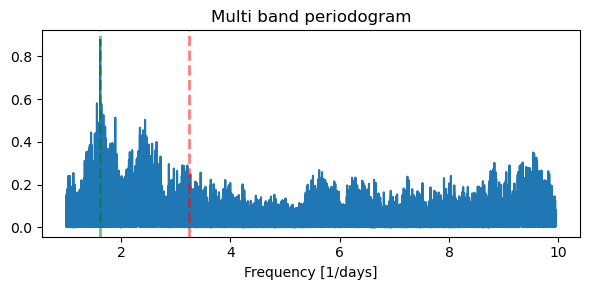

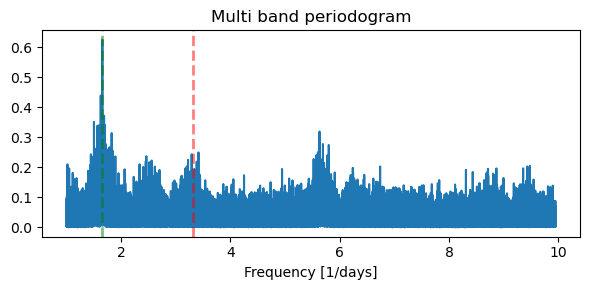

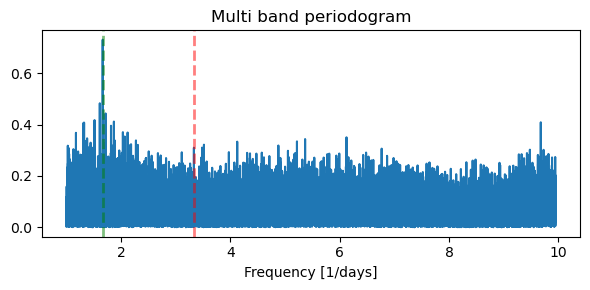

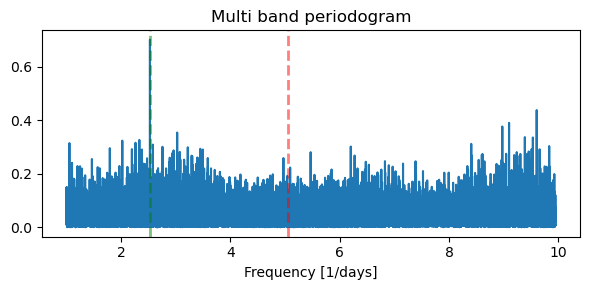

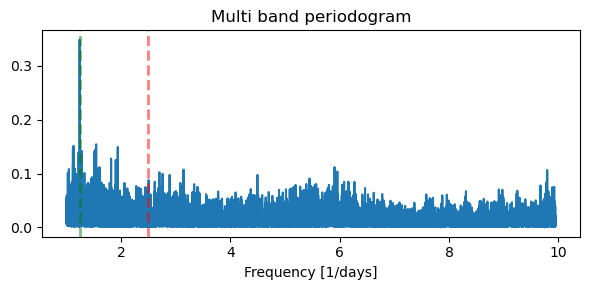

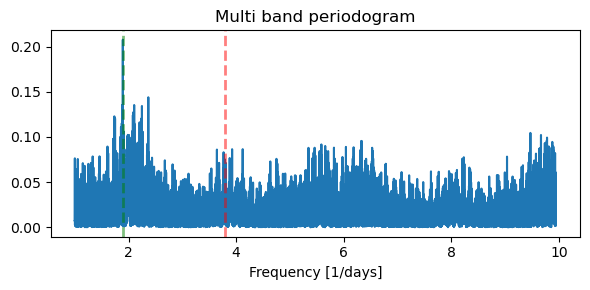

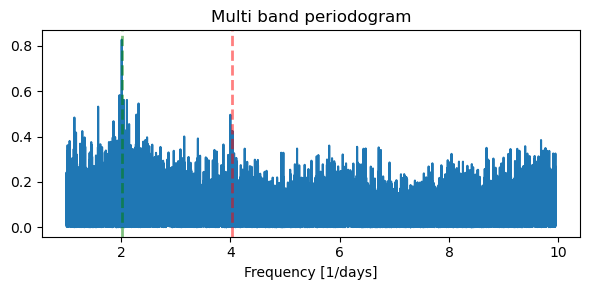

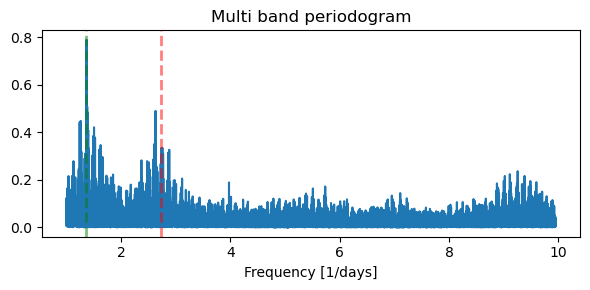

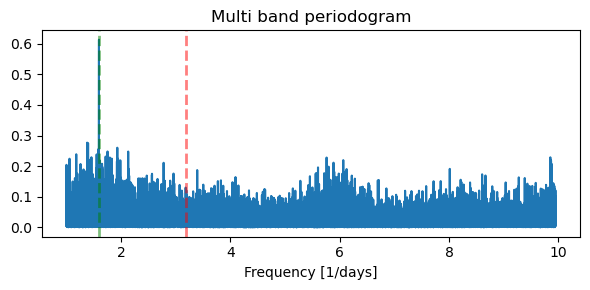

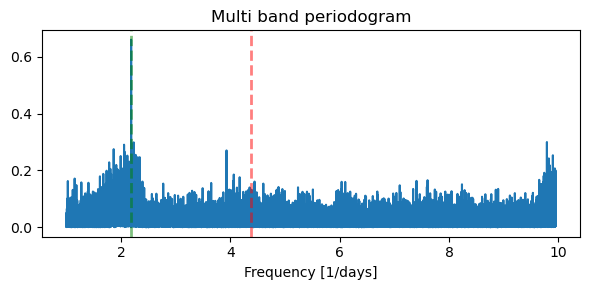

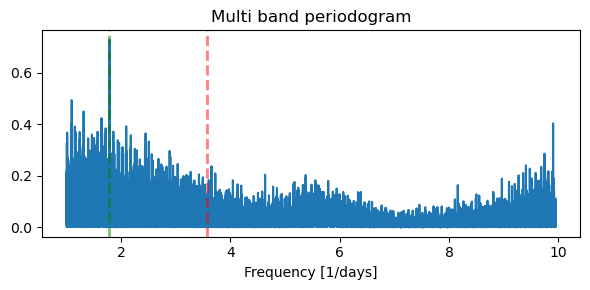

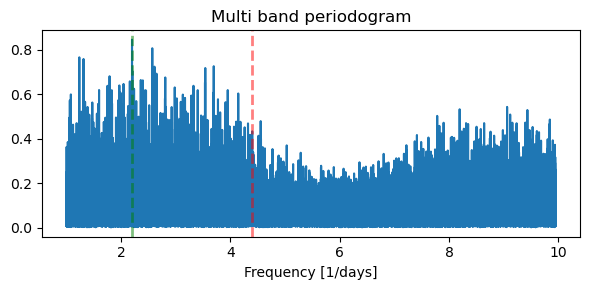

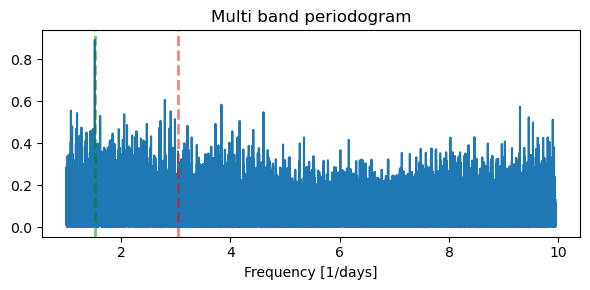

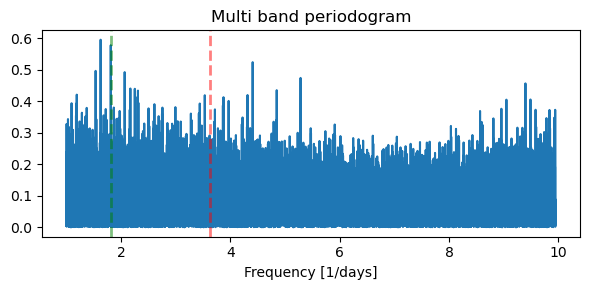

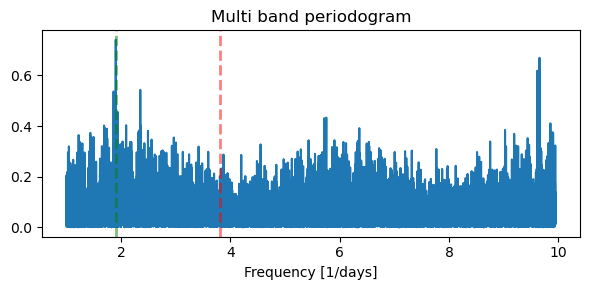

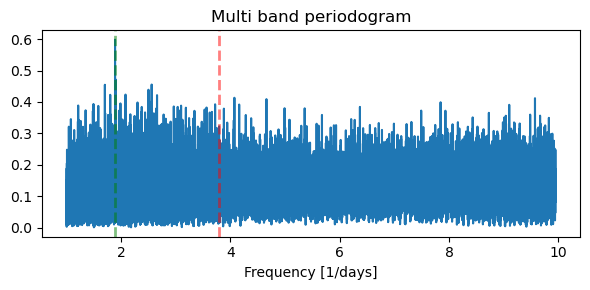

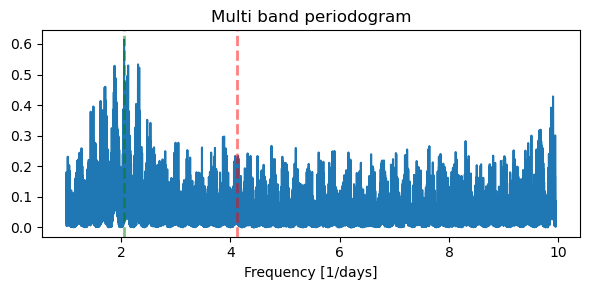

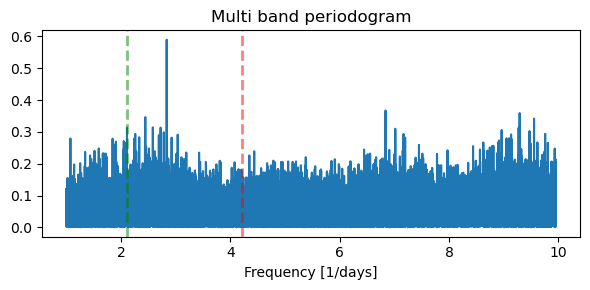

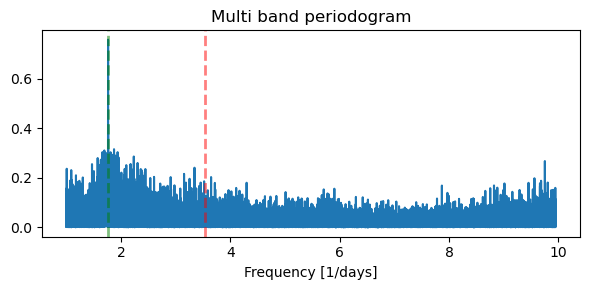

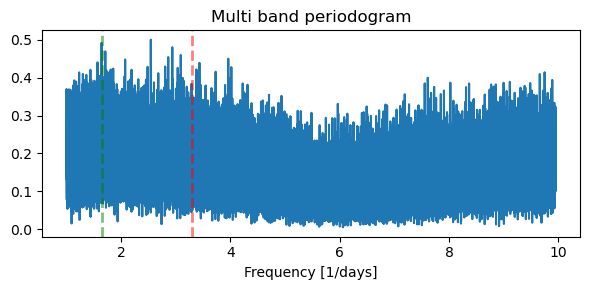

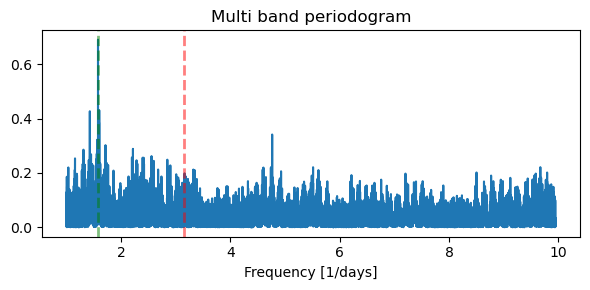

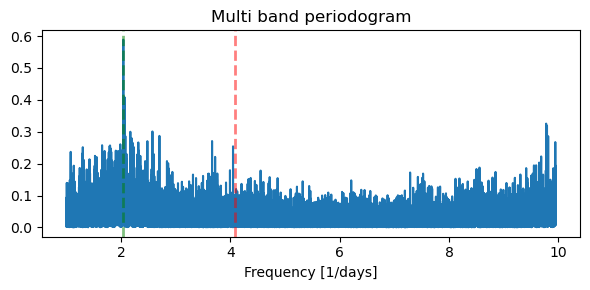

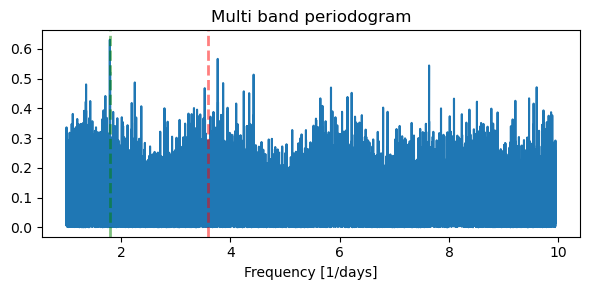

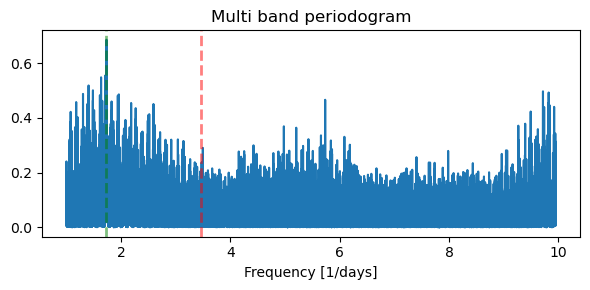

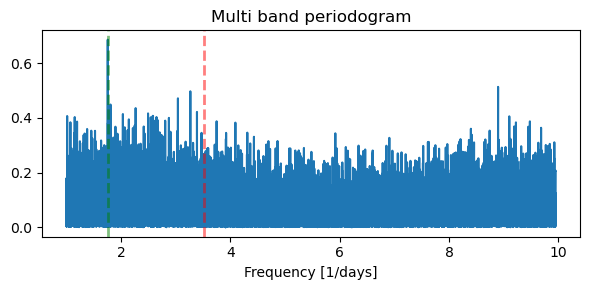

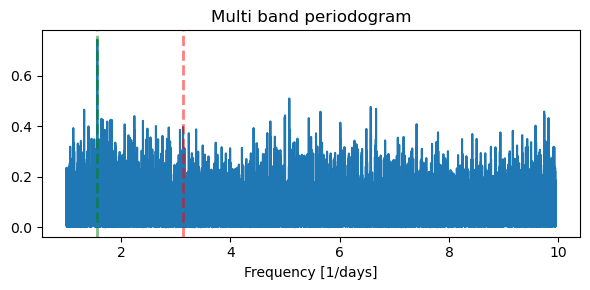

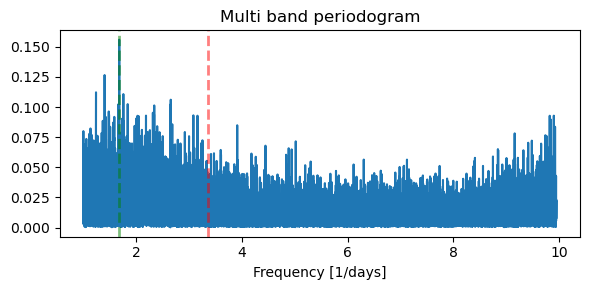

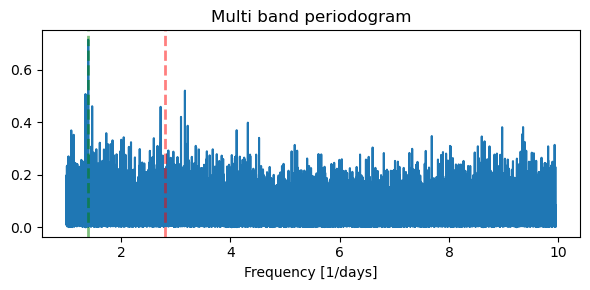

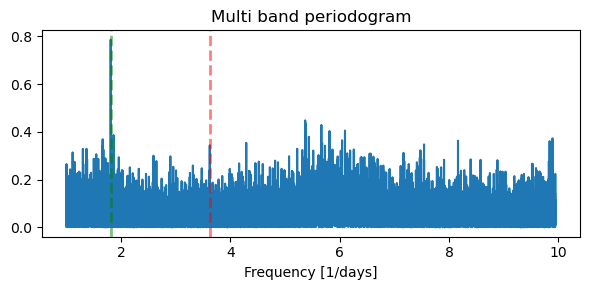

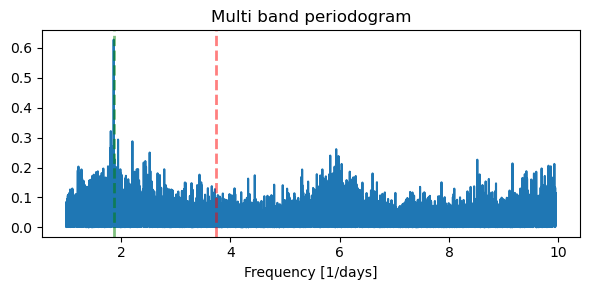

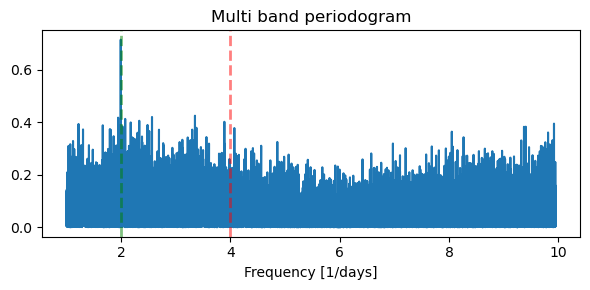

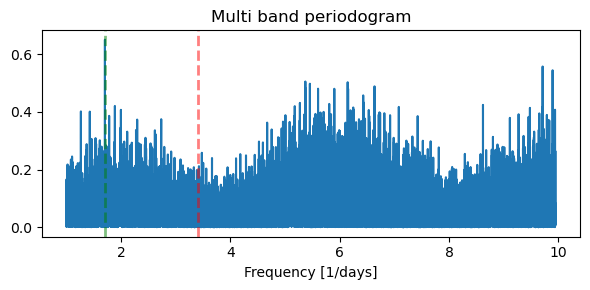

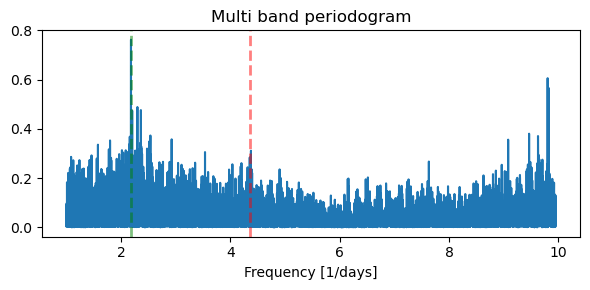

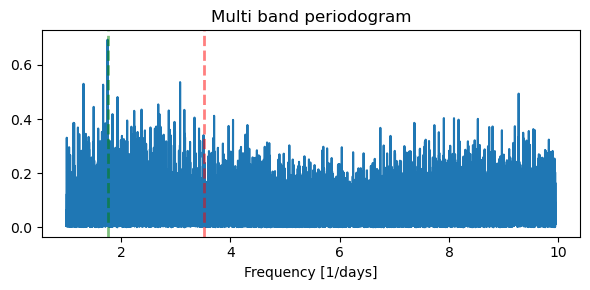

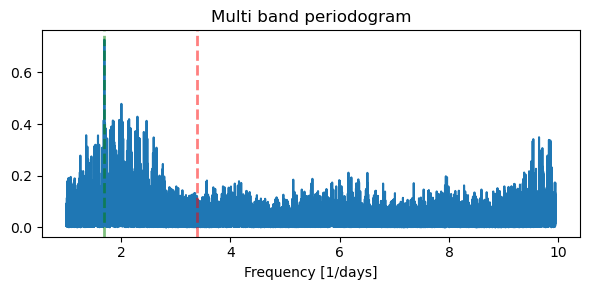

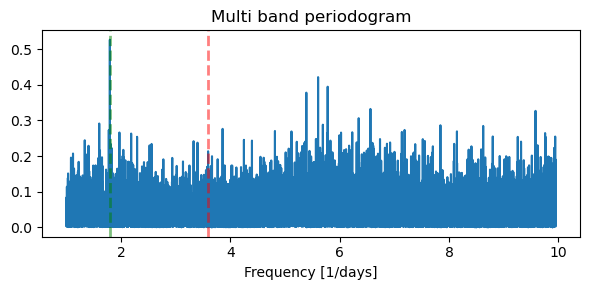

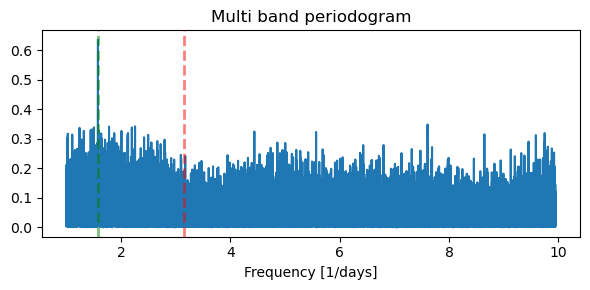

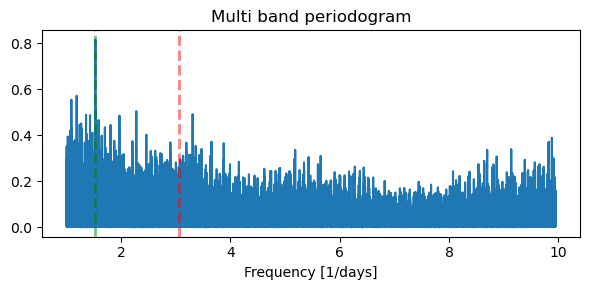

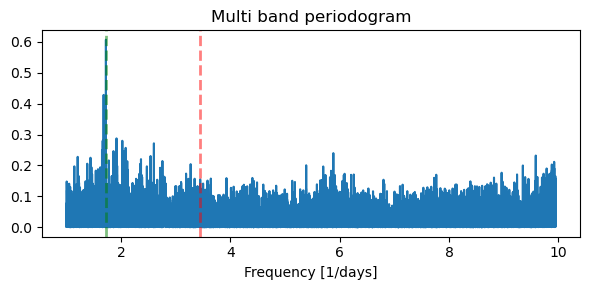

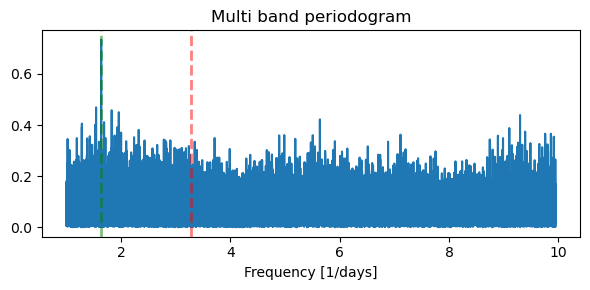

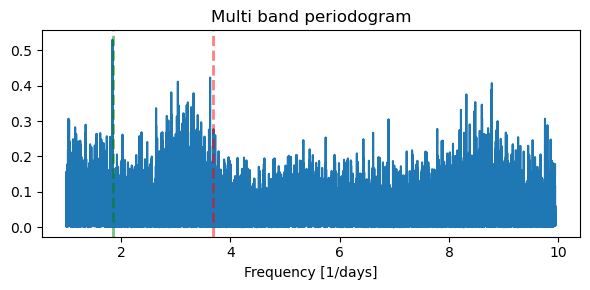

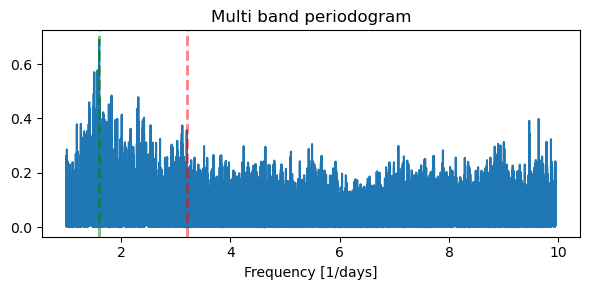

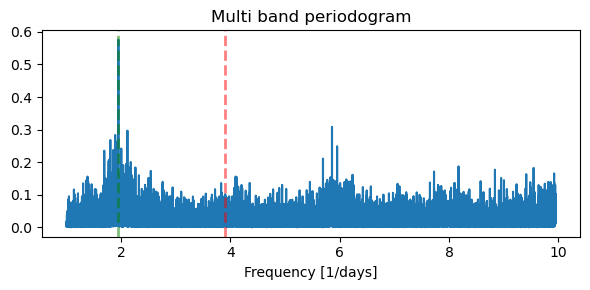

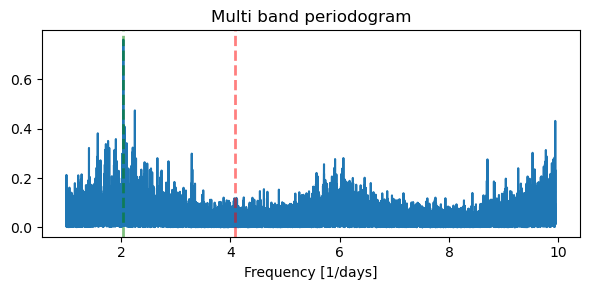

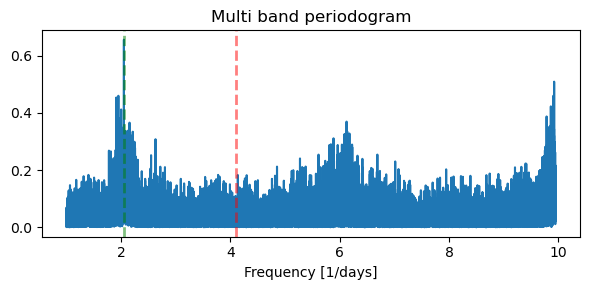

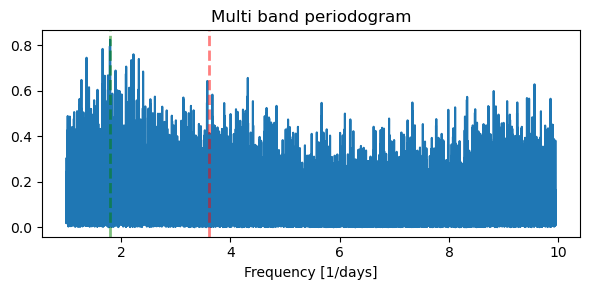

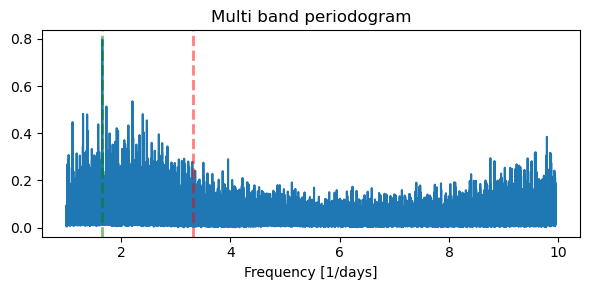

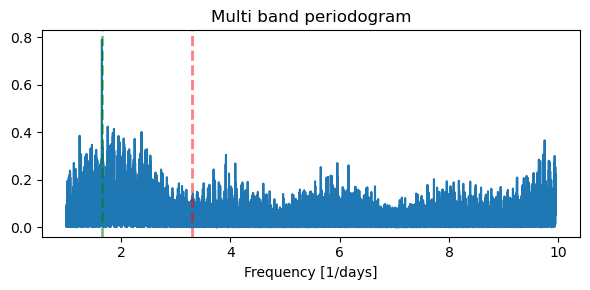

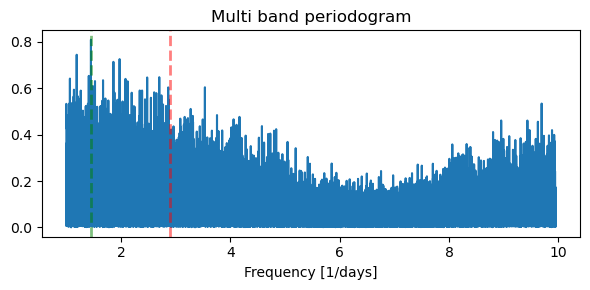

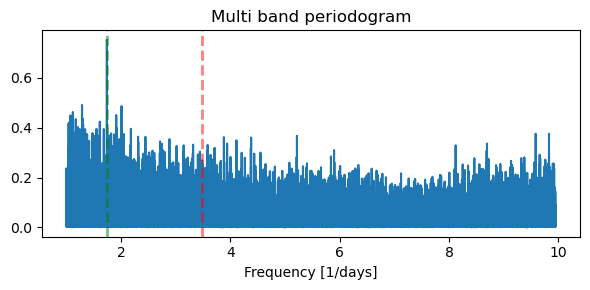

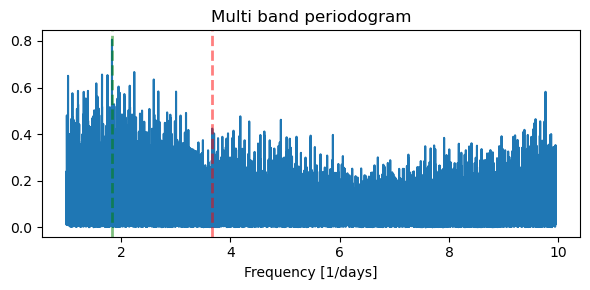

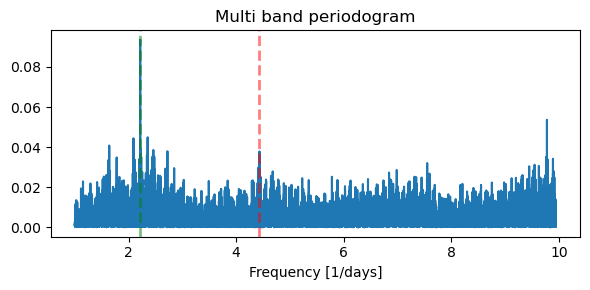

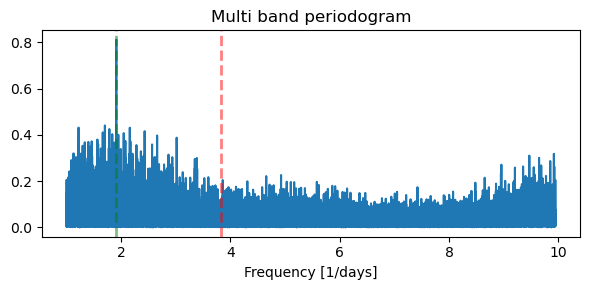

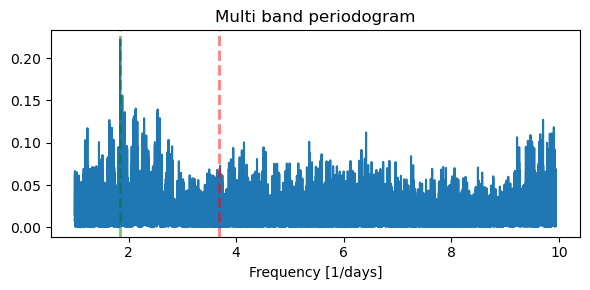

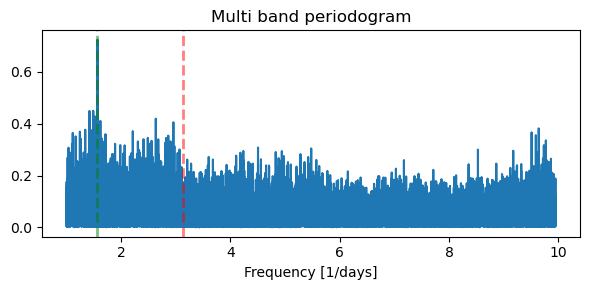

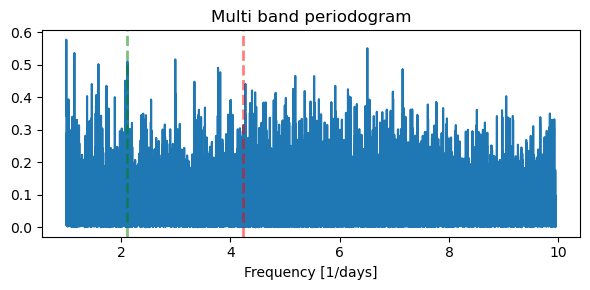

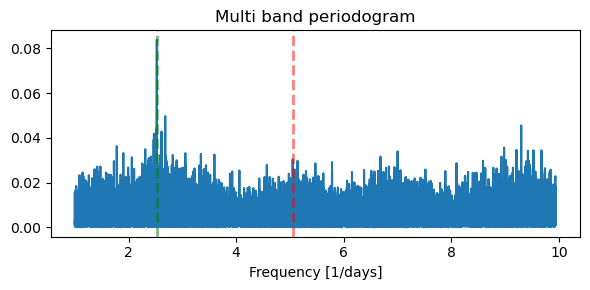

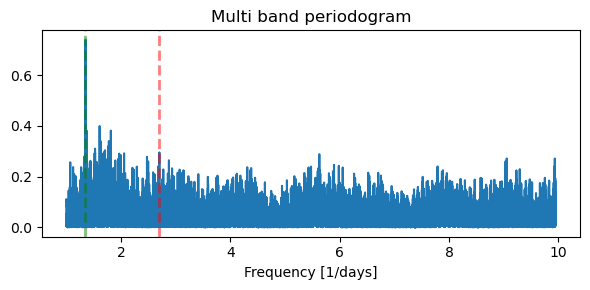

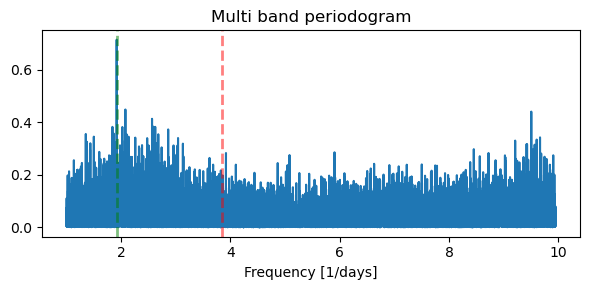

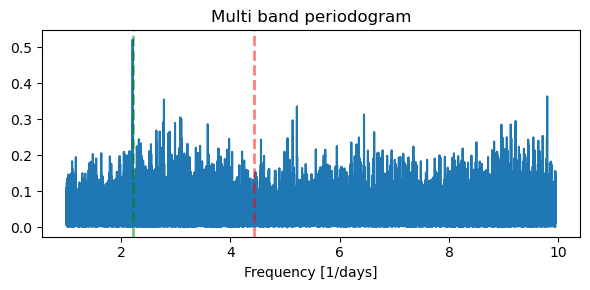

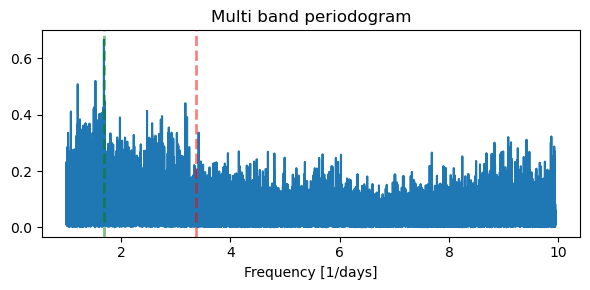

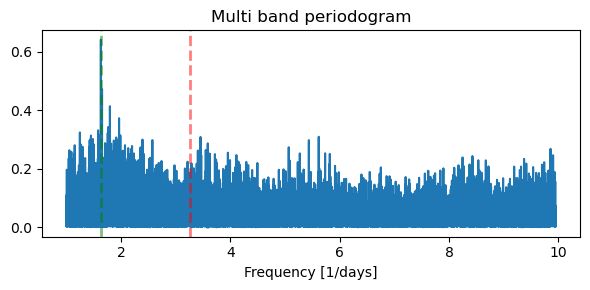

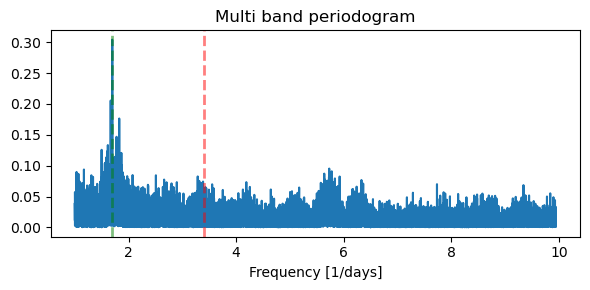

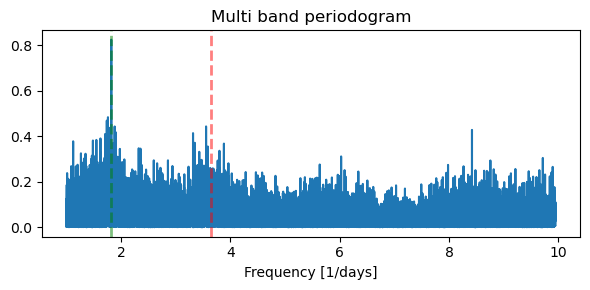

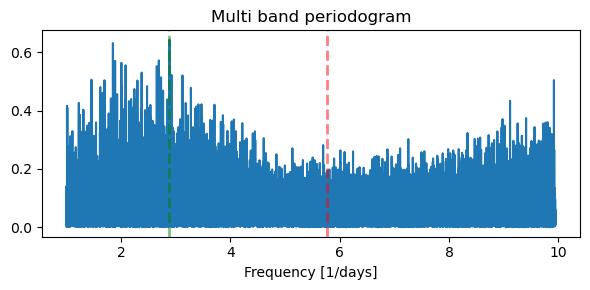

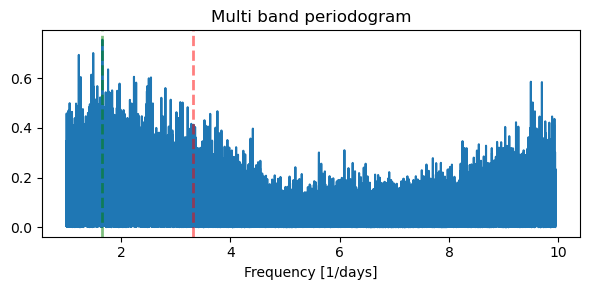

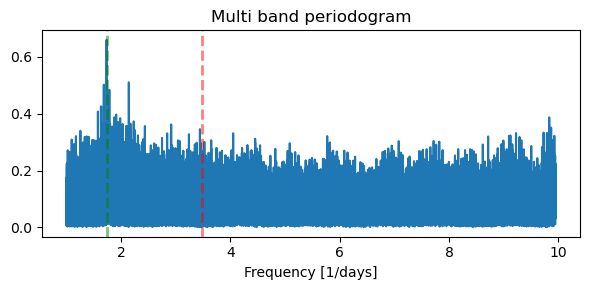

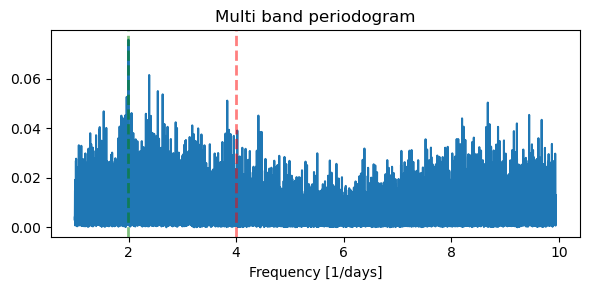

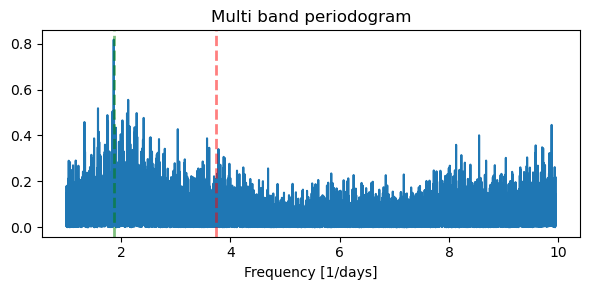

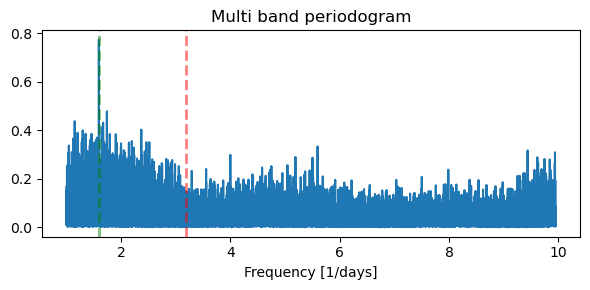

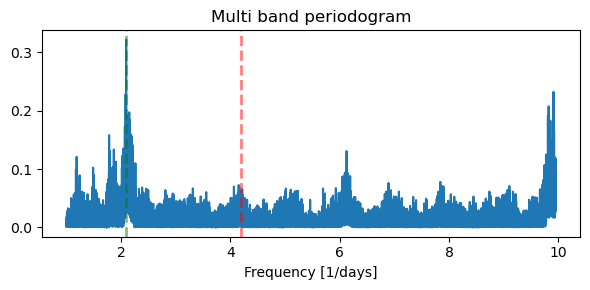

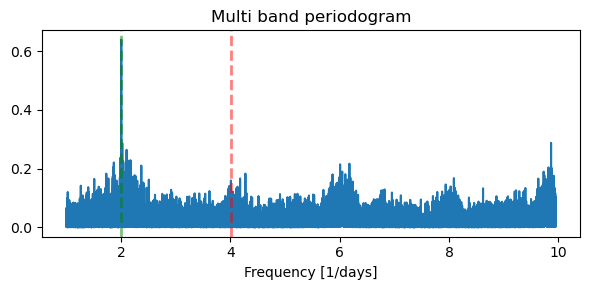

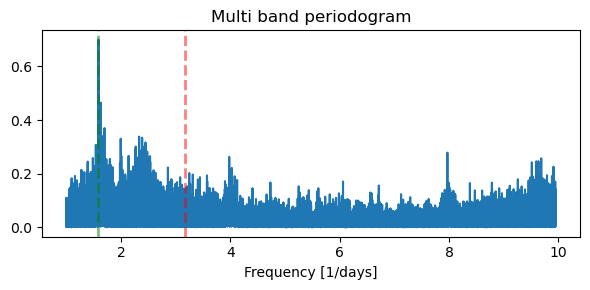

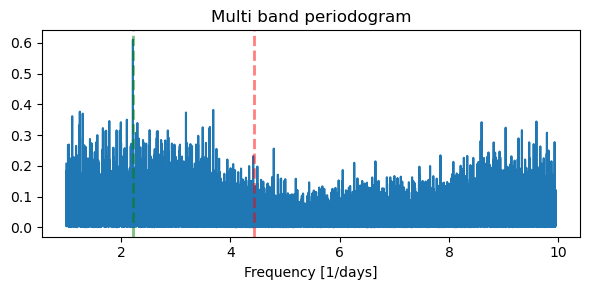

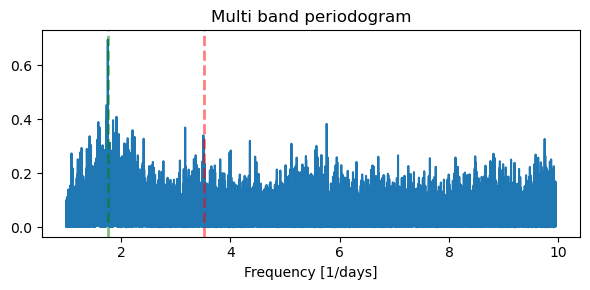

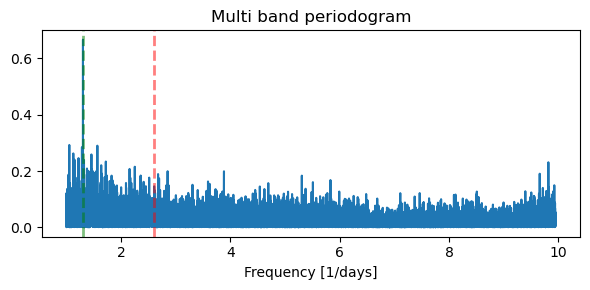

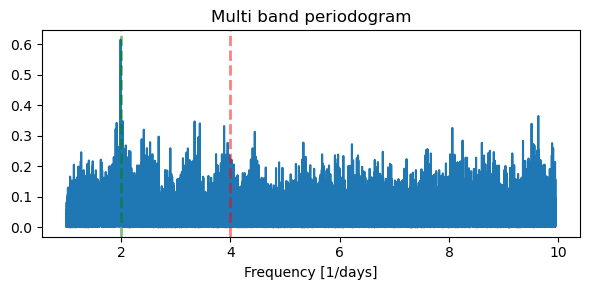

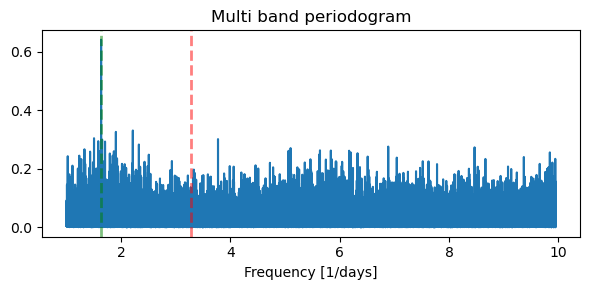

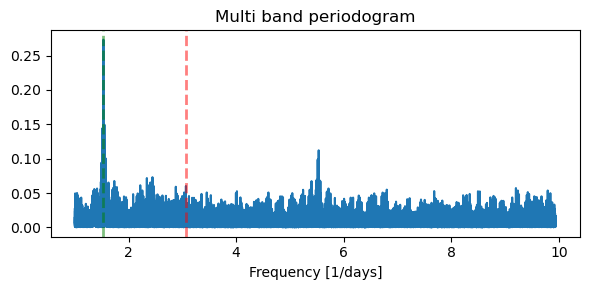

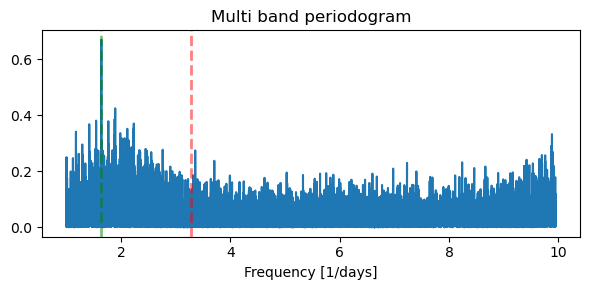

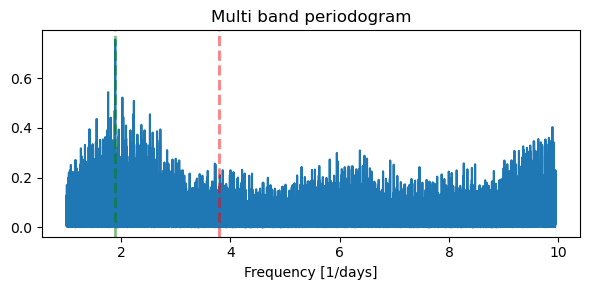

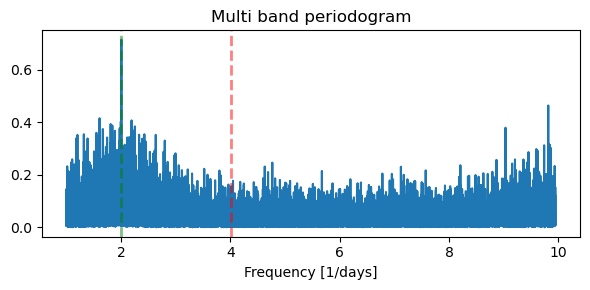

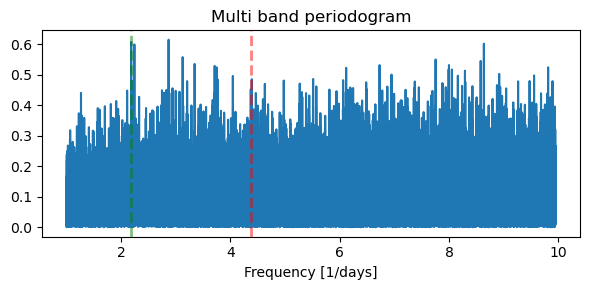

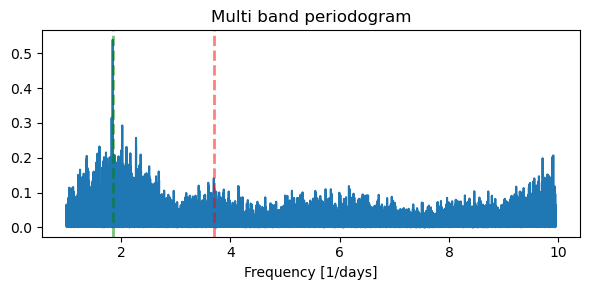

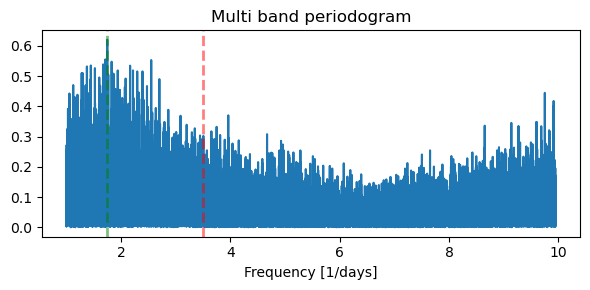

In [7]:
directory = '../dataset'

for folder_type in os.listdir(directory):
    #../dataset/ECL
    d_folder_type = os.path.join(directory, folder_type)
    if folder_type == "ECL":
        freq = np.arange(0.001473, 2*4.999929 , 1e-4)
    else:
        freq = np.arange(1.00061, 2*4.973236 , 1e-4)
    if folder_type.find('.') == -1:
        for folder_lc in os.listdir(d_folder_type):
            # 4349198890274016128
            d_folder_lc = os.path.join(d_folder_type, folder_lc)
            lc = pd.read_pickle(os.path.join(d_folder_lc, folder_lc+'.pkl'))
            name_lc = lc.source_id.iloc[0]
            period = data_global[data_global.index == name_lc].values[0][0]
            #folded_lc_image(lc, period, d_folder_lc)
            #periodograms_band(lc, period,d_folder_lc, freq)
            periodogram_multiband(lc,period, d_folder_lc, freq)


#### curva que da error
d_folder_lc = '../dataset/RR/2054001558797686400'

In [8]:
'''directory = '../dataset'
lc_problem = []

for folder_type in os.listdir(directory):
    #../dataset/ECL
    if folder_type == "RR":
        d_folder_type = os.path.join(directory, folder_type)
        freq = np.arange(1.119494, 2*2.887145 , 0.005)
        if folder_type.find('.') == -1:
            for folder_lc in os.listdir(d_folder_type):
                # 4349198890274016128
                d_folder_lc = os.path.join(d_folder_type, folder_lc)
                lc = pd.read_pickle(os.path.join(d_folder_lc, folder_lc+'.pkl'))
                name_lc = lc['source_id'].loc[0]
                period = data_global[data_global.index == name_lc].values[0][0]
                #folded_lc_image(lc, period, d_folder_lc)
                if lc.flux.isna().any():
                    x=2
                    #lc_problem.append(d_folder_lc)
                else:
                    if d_folder_lc in lc_problem:
                        periodograms_band(lc, period,d_folder_lc, freq)
                #periodogram_multiband(lc,period, d_folder_lc, freq)'''

'directory = \'../dataset\'\nlc_problem = []\n\nfor folder_type in os.listdir(directory):\n    #../dataset/ECL\n    if folder_type == "RR":\n        d_folder_type = os.path.join(directory, folder_type)\n        freq = np.arange(1.119494, 2*2.887145 , 0.005)\n        if folder_type.find(\'.\') == -1:\n            for folder_lc in os.listdir(d_folder_type):\n                # 4349198890274016128\n                d_folder_lc = os.path.join(d_folder_type, folder_lc)\n                lc = pd.read_pickle(os.path.join(d_folder_lc, folder_lc+\'.pkl\'))\n                name_lc = lc[\'source_id\'].loc[0]\n                period = data_global[data_global.index == name_lc].values[0][0]\n                #folded_lc_image(lc, period, d_folder_lc)\n                if lc.flux.isna().any():\n                    x=2\n                    #lc_problem.append(d_folder_lc)\n                else:\n                    if d_folder_lc in lc_problem:\n                        periodograms_band(lc, period,d_folder_

: 